# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the dataset
data = pd.read_excel("customer_retention_dataset.xlsx")
pd.set_option("display.max_columns",None)
data

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

Observations from the dataset

The dataset contains the details of all the customers who shop online frequently and their experience of buying products online. As per the dataset, it has two important values that affects the repition purchase of the customer i.e. Utilitarian Value and Hedonistic Value.The dataset contains numerical, categorical as well as alphanumerical data. The concluded analysis will indicate the e-retail success rates.

# Exploratory Data Analysis

In [6]:
#Checking the dimensions of dataset
data.shape

(269, 71)

In [7]:
#checking the ttype of data
data.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

The Pincode coloumn has integer datatype compared to all other coloumns which has object data type. 

# Changing the name of the coloumns to get a better working on the dataset.

In [8]:
columns= ['Gender','Age','City','Pincode','Yrs_of_Shopping','Shopping_Frequency','Internet','Device',
           'Screen_Size','OS', 'Browser','Channel_Used','Login_Via','Time_Spent','Payment','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','Website_Efficient',
           'Recommendation']


In [9]:
data.columns=columns


In [10]:
data.head()

Gender          Age           City  Pincode Yrs_of_Shopping  \
0    Male  31-40 years          Delhi   110009   Above 4 years   
1  Female  21-30 years          Delhi   110030   Above 4 years   
2  Female  21-30 years  Greater Noida   201308       3-4 years   
3    Male  21-30 years        Karnal    132001       3-4 years   
4  Female  21-30 years     Bangalore    530068       2-3 years   

   Shopping_Frequency         Internet      Device Screen_Size  \
0         31-40 times          Dial-up     Desktop      Others   
1  41 times and above            Wi-Fi  Smartphone  4.7 inches   
2  41 times and above  Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times  Mobile Internet  Smartphone  5.5 inches   
4         11-20 times            Wi-Fi  Smartphone  4.7 inches   

                      OS        Browser       Channel_Used        Login_Via  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

          Time_Spent                             Payment Abandon_Frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards   Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

              Abandon_Reason Content_Readability Similar_Product_Info  \
0              Lack of trust           Agree (4)      Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)   Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)            Agree (4)   
3   Better alternative offer           Agree (4)            Agree (4)   
4   Better alternative offer  Strongly agree (5)      Indifferent (3)   

  Seller_Product_Info Product_Info_Clarity     Navigation_Ease  \
0     Indifferent (3)            Agree (4)           Agree (4)   
1  Strongly agree (5)   Strongly agree (5)  Strongly agree (5)   
2           Agree (4)            Agree (4)           Agree (4)   
3     Indifferent (3)            Agree (4)  Strongly agree (5)   
4     Indifferent (3)            Agree (4)           Agree (4)   

  Loading_Processing_Speed User_Friendly_Interface Convenient_Payment_Mode  \
0    Strongly disagree (1)           Dis-agree (2)           Dis-agree (2)   
1       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   
2                Agree (4)      Strongly agree (5)      Strongly agree (5)   
3                Agree (4)      Strongly agree (5)      Strongly agree (5)   
4       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   

  Timely_Fulfilment_Trust Customer_Support_Response  \
0            Disagree (2)        Strongly agree (5)   
1      Strongly agree (5)        Strongly agree (5)   
2      Strongly agree (5)        Strongly agree (5)   
3               Agree (4)        Strongly agree (5)   
4               Agree (4)        Strongly agree (5)   

  Customer_Privacy_Guarantee Various_Channel_Responses            Benefits  \
0                  Agree (4)                 Agree (4)     indifferent (3)   
1         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
3         Strongly agree (5)                 Agree (4)           Agree (4)   
4                  Agree (4)        Strongly agree (5)  Strongly agree (5)   

                   Enjoy         Convenience Return_Replacement_Policy  \
0  Strongly disagree (1)       Dis-agree (2)             Dis-agree (2)   
1     Strong

In [11]:
#Checking null values in the dataset
data.isnull().sum()

Gender                  0
Age                     0
City                    0
Pincode                 0
Yrs_of_Shopping         0
                       ..
Late_Delivery           0
WebApp_Design_Change    0
Page_Disruption         0
Website_Efficient       0
Recommendation          0
Length: 71, dtype: int64

There is no missing data in the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

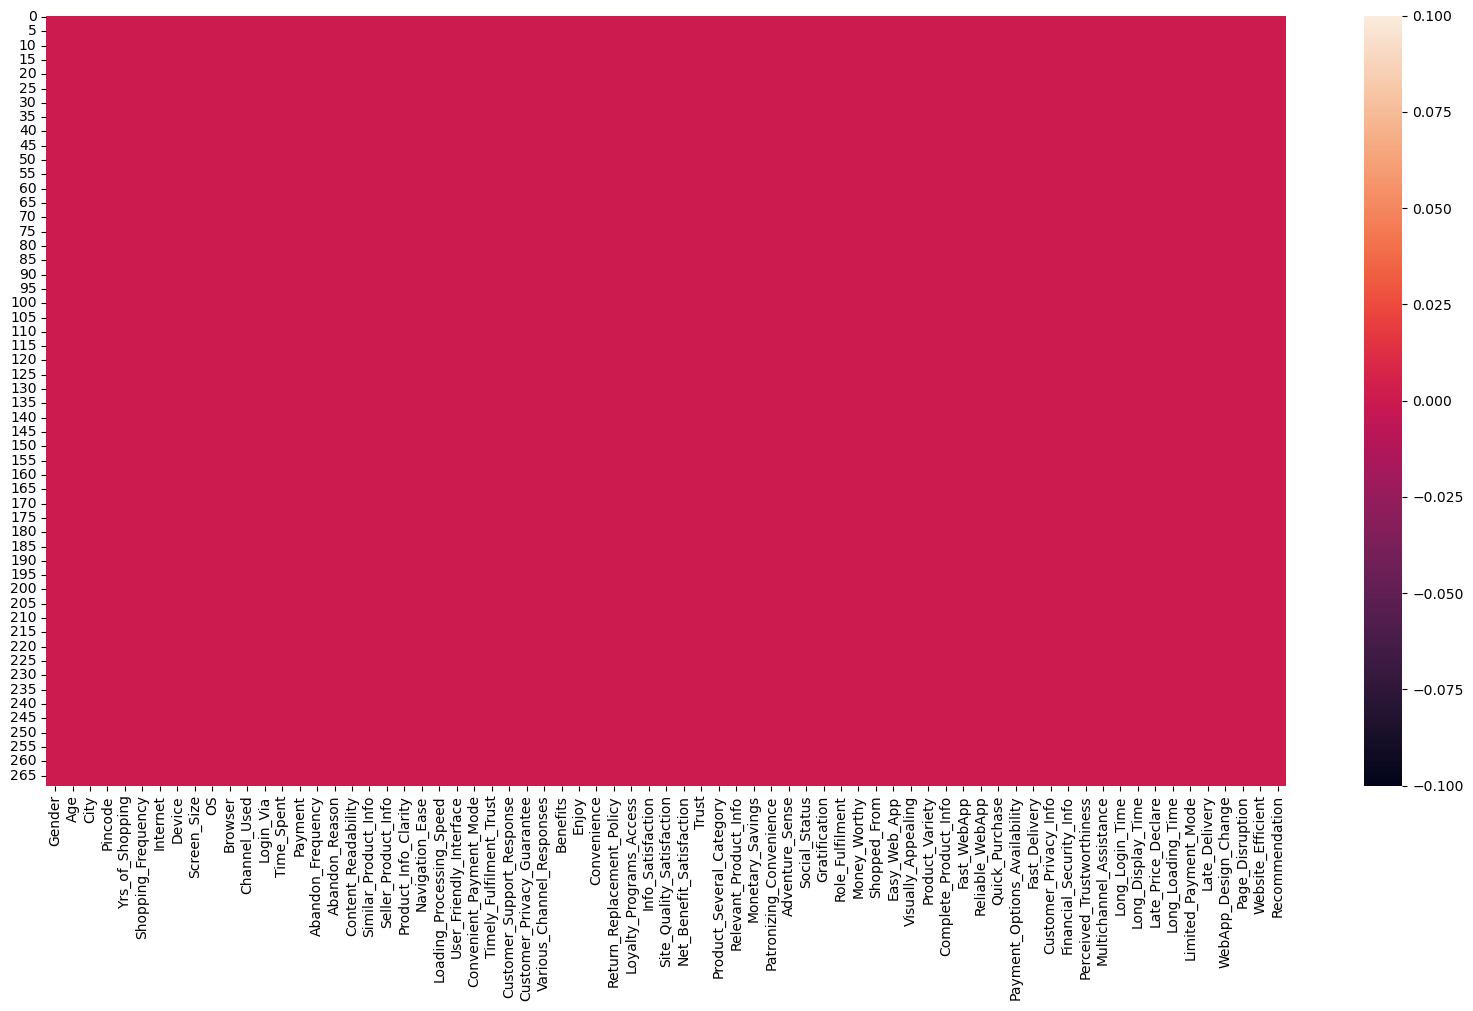

In [12]:
#Visualizing the data for a clearer view if any null values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())
plt.show

# Data Visualization

The visualization of data has to be divided into different parts. As there are 71 columns in the dataset it is not possible to showcase those in charts individually.

The visualization can be divided into three to four different categories.

1. From the first category the count of customers,different age categories,different portals they use and etc categories can be represented in visualization.

2. The experience of customers about the online shopping/product buying can be  represented.

3. The different platfroms used by the customers for online shopping or buying products, and their preferenes with respect to websites/apps can be showcaesed.

# Univariate Analysis

In [13]:
#defining the functions to display the data
def count(x):
    plt.figure(figsize = (10,5))
    sns.countplot(x,data = data)
    plt.show()

In [14]:
def ycount(y):
    plt.figure(figsize = (10,10))
    sns.countplot(y = y ,data = data)
    plt.show()

In [15]:
def hist(x):
    plt.figure(figsize = (15,5))
    sns.histplot(x)
    plt.show()

Female    181
Male       88
Name: Gender, dtype: int64


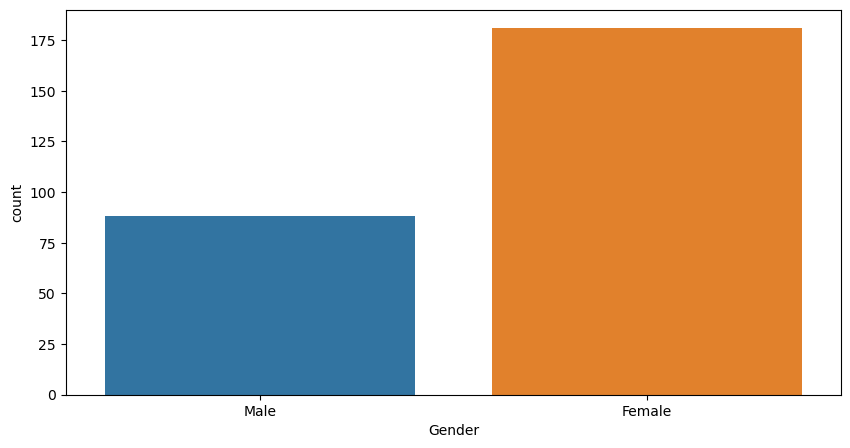

In [16]:
print(data['Gender'].value_counts())
count(data['Gender'])

The results shows that more than 50% of the customers are female i.e 188 as compared to male which is 88

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


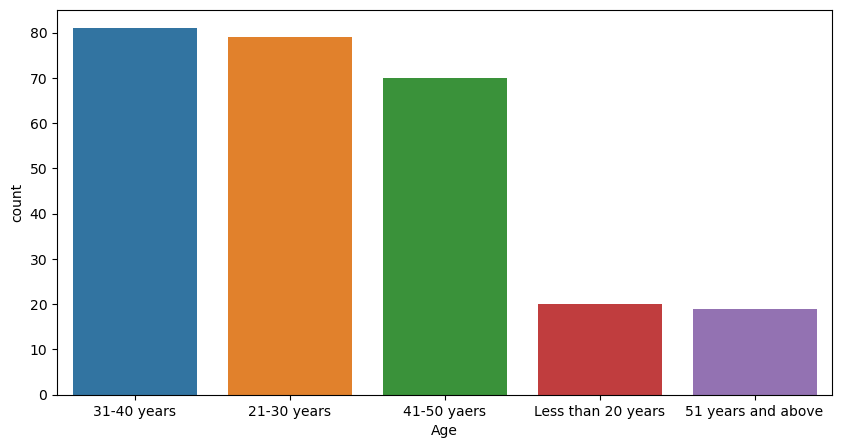

In [17]:
print(data['Age'].value_counts())
count(data['Age'])

It can be observed that people having ages between 21-50 yrs are the customers who shop the most. The 31-40yes category has the maximum no. of customers followed by 21-30yrs and 41-50yrs. The people aged between 51ys and above are the least ones to shop online. 

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64


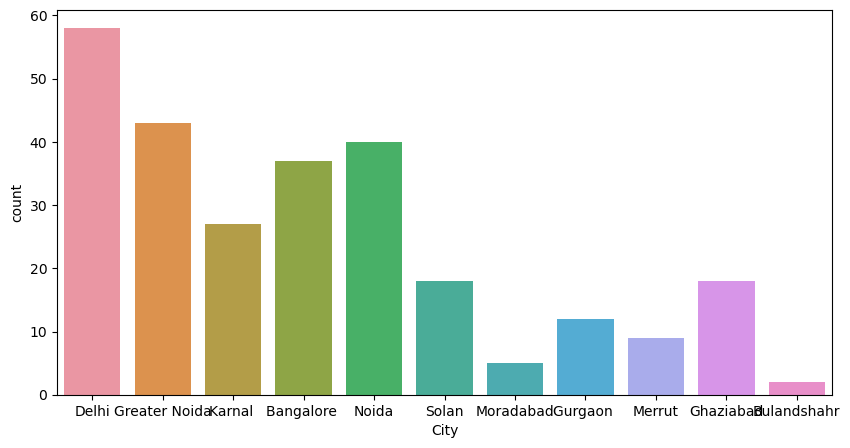

In [18]:
print(data['City'].value_counts())
count(data['City'])

Delhi is the most popular city for shopping followed by Noida and Banglore. Merrut, Moradabad, Bulandshahr are the cities the the minimum nos.

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device, dtype: int64


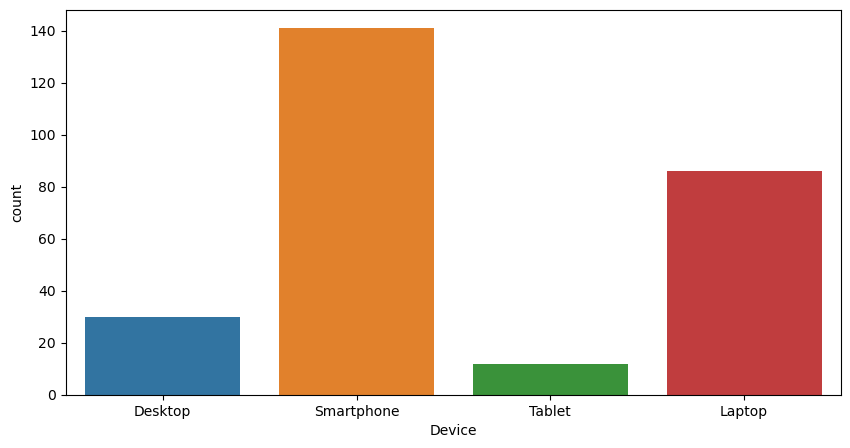

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: Internet, dtype: int64


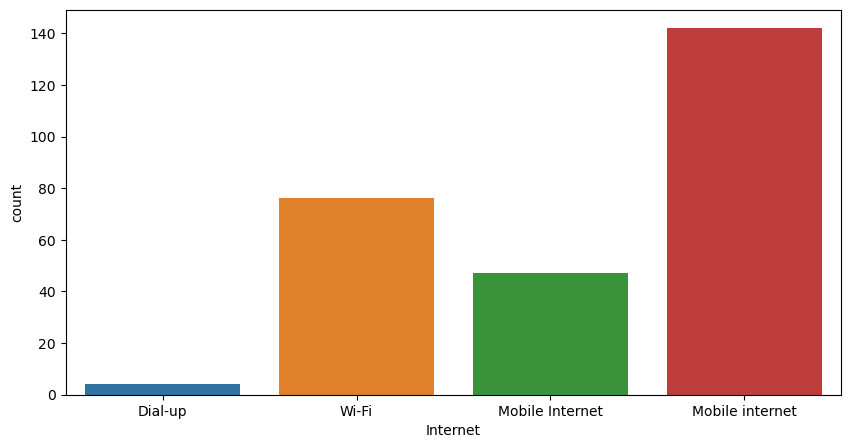

In [24]:
print(data['Device'].value_counts())
count(data['Device'])
print(data['Internet'].value_counts())
count(data['Internet'])

From the above plots it can be observed that most of the people uses their smarphones and mobile internet for placing the orders. 

3    98
1    65
2    47
4    43
0    16
Name: Yrs_of_Shopping, dtype: int64


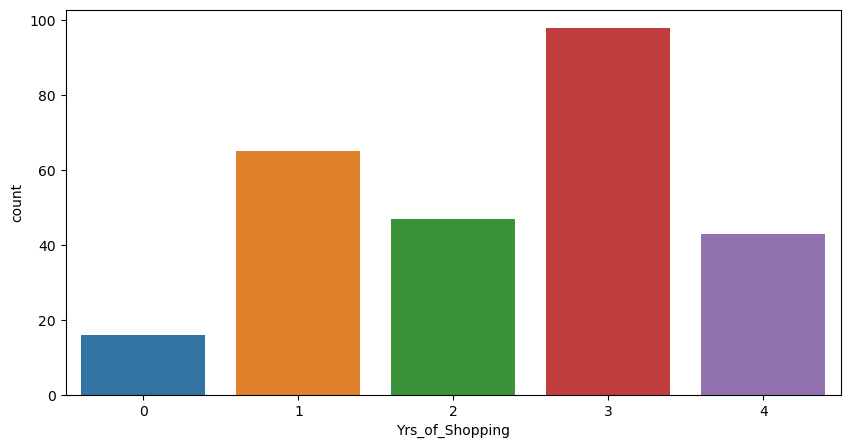

5    114
2     63
3     47
0     29
1     10
4      6
Name: Shopping_Frequency, dtype: int64


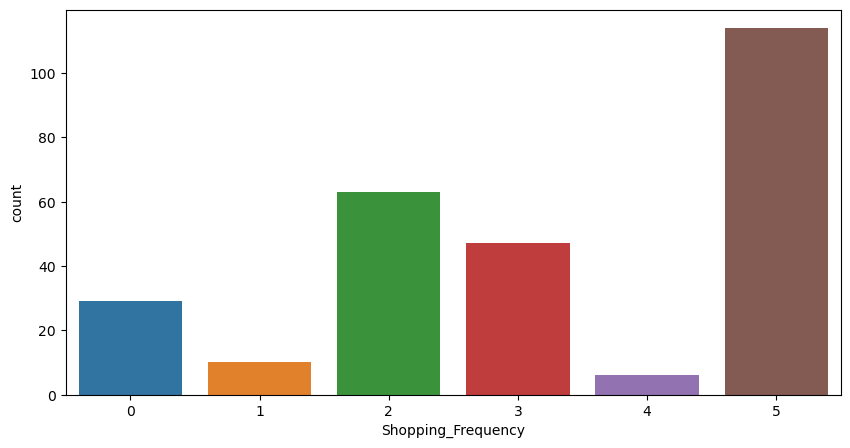

In [78]:
print(data['Yrs_of_Shopping'].value_counts())
count(data['Yrs_of_Shopping'])
print(data['Shopping_Frequency'].value_counts())
count(data['Shopping_Frequency'])

4    123
2     71
1     46
3     15
0     14
Name: Time_Spent, dtype: int64


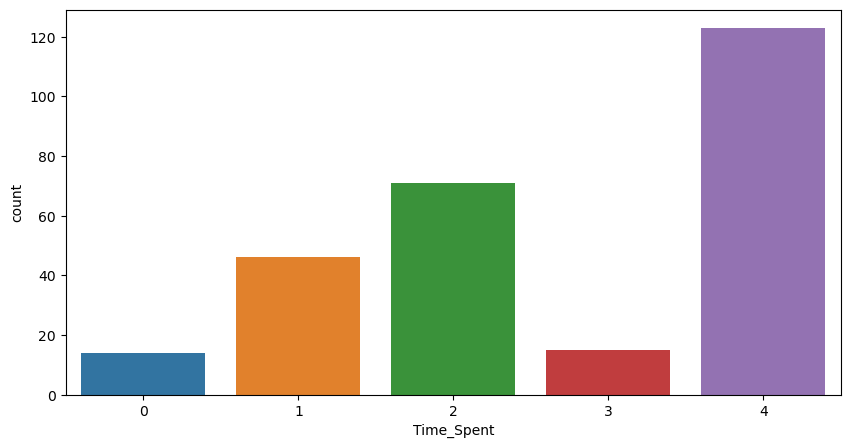

In [79]:
print(data['Time_Spent'].value_counts())
count(data['Time_Spent'])

On an average most of the customers spend more than 15mins for shopping for the products online

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel_Used, dtype: int64


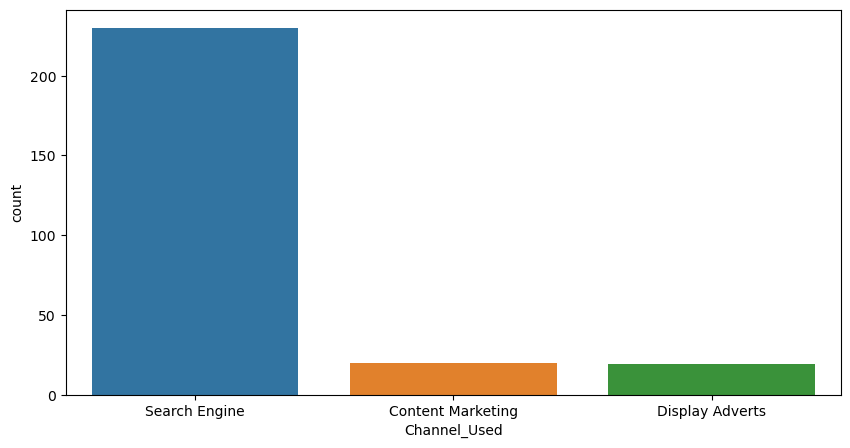

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Login_Via, dtype: int64


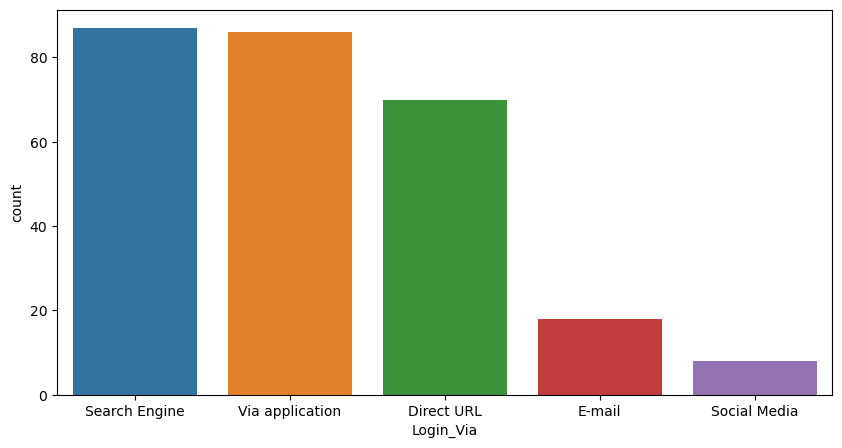

In [22]:
print(data['Channel_Used'].value_counts())
count(data['Channel_Used'])
print(data['Login_Via'].value_counts())
count(data['Login_Via'])

Most of the shopping is done on Search Engines as the platforms by the customers and least by Social medial 

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment, dtype: int64


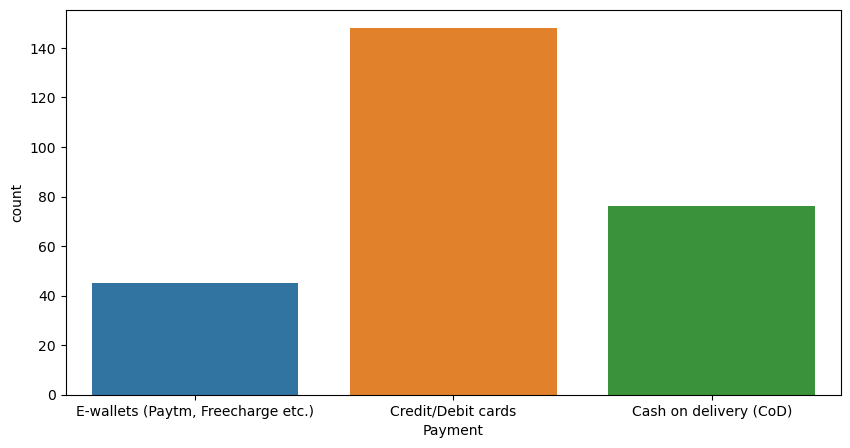

In [25]:
print(data['Payment'].value_counts())
count(data['Payment'])

From the above plot it can be observed that 148 no. of customers use credit and debit cards for transaction followed by 76 no. of customers uses COD and least no. of customers does E-wallet transactions for shopping. 

Observations from Univariate Analysis

1.	Females are most interested in shopping as there are more that 50% women customers.

2.	It can be observed that people having ages between 21-50 yrs are the customers who shop the most. The 31-40yrs category has the maximum no. of customers followed by 21-30yrs and 41-50yrs. The people aged between 51ys and above are the least ones to shop online.

3.	Most of the customers from the city Delhi, Greater Noida, Noida and Bangalore are used to shop online and the shopping count is high in these cities.

4.	Most of the customers found shopping online for more than 4 years and the count is high for the same followed by the customers shopping for 2-3 years.

5.	In last 1 year, most of the customers were purchased online less than 10 times and only few of the customers purchased online 21-30 times.

6.	Most of the customers used Smartphone device to access the online shopping and only few customers used Tablet to access the online shopping.

7.	The count is high for others mobile screen size followed by 5.5 inches screen size and 5 inches screen size has least count. That means, the customers who have thier mobile screen size other than mentioned inches shopped more online followed by 5.5 inches and the customers having mobile screen size 5 inches shopped very less.

8.	Most of the customers used Google chrome to access the website and only few of the customers used Opera and Mozilla Firefox to access the online shopping website.

9.	Most of the customers used Search Engine and Via application to reach the online retail store after their first visit and also some customers used Detect URL to reach the online store. Which means these customers have downloaded their most favourite application to reach the online stores easily.

10.	Many customers took more than 15 mins before making the purchase decision and some of the customers explored 6-10 mins.

11.	Most of the customers abandoned their shopping cart sometimes and some of the customers abandoned their shopping cart frequently.

12.	Around 133 customers abandoned their bag due to some better alternative offer and 54 customers abandoned due to promo code not applicable.


# Bivariate Analysis

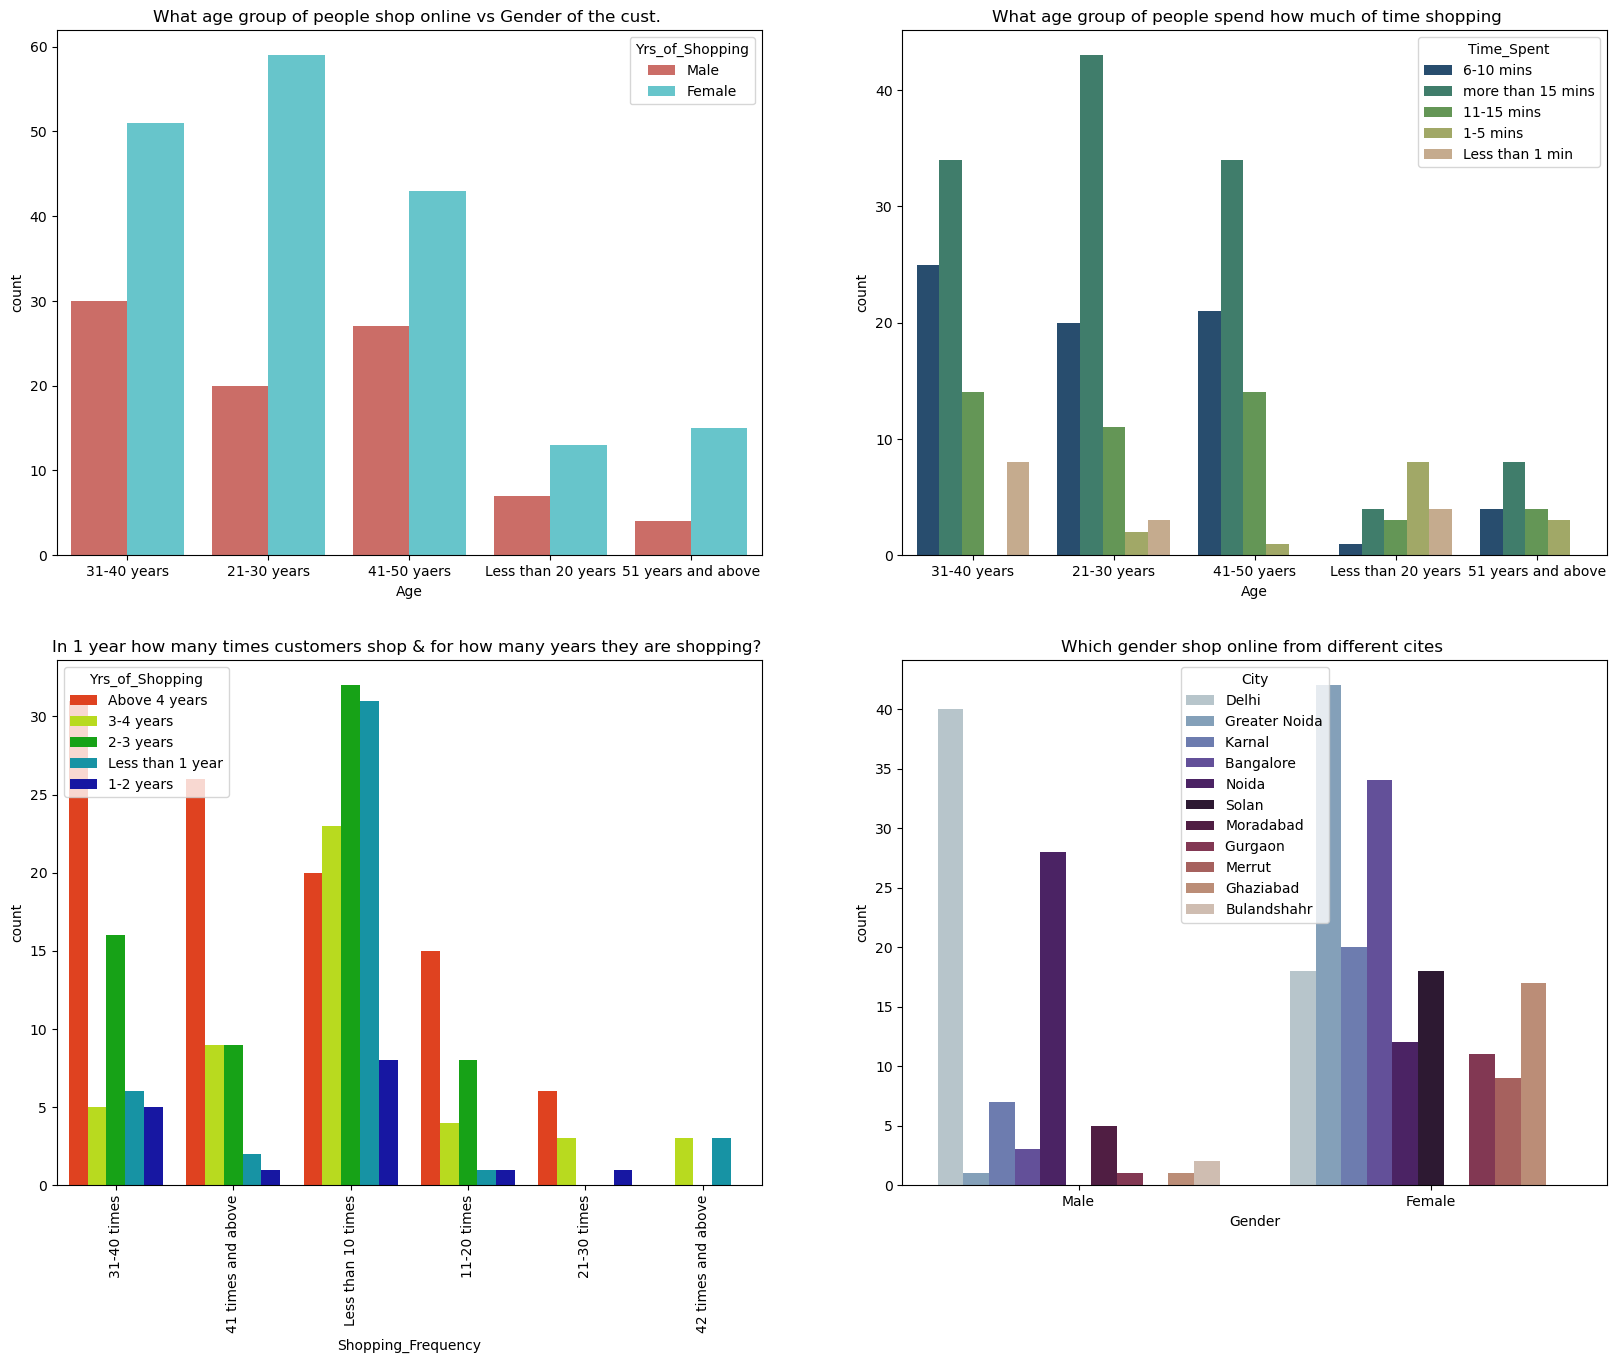

In [29]:
# Comparison between two variables
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('What age group of people shop online vs Gender of the cust. ')
sns.countplot(data['Age'], hue=data['Gender'],palette='hls')

plt.subplot(2,2,2)
plt.title('What age group of people spend how much of time shopping   ')
sns.countplot(data['Age'], hue=data['Time_Spent'],palette='gist_earth')

plt.subplot(2,2,4)
plt.title('Which gender shop online from different cites ')
sns.countplot(data['Gender'], hue=data['City'],palette='twilight')

plt.subplot(2,2,3)
plt.title('In 1 year how many times customers shop & for how many years they are shopping? ')
sns.countplot(data['Shopping_Frequency'], hue=data['Yrs_of_Shopping'],palette='nipy_spectral_r')

plt.xticks(rotation=90)
plt.subplot(2,2,1).legend(loc='upper left',title='Shopping_Frequency')
plt.subplot(2,2,1).legend(loc='upper right',title='Yrs_of_Shopping')
plt.show()

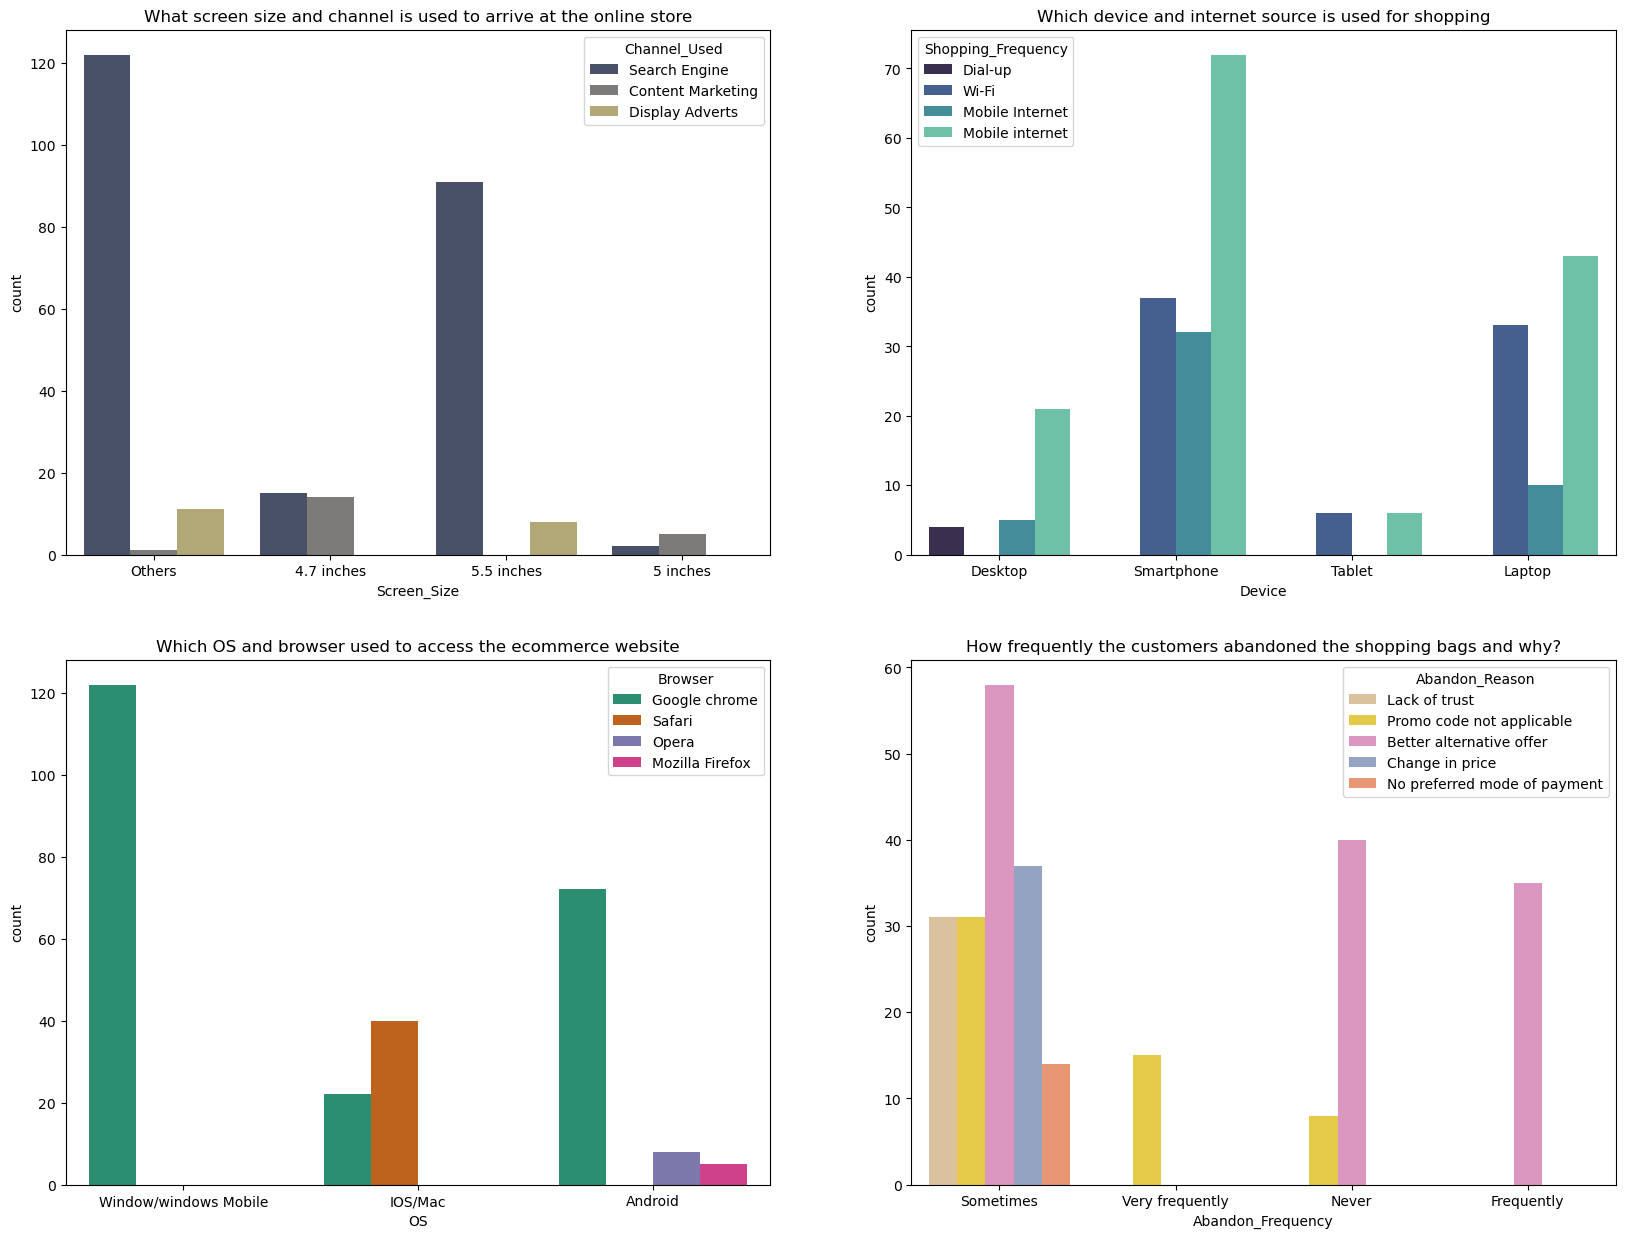

In [39]:
# Comparision between two variables
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('What screen size and channel is used to arrive at the online store',fontsize=12)
sns.countplot(data['Screen_Size'],hue=data['Channel_Used'],palette="cividis");

plt.subplot(2,2,2)
plt.title('Which device and internet source is used for shopping',fontsize=12)
sns.countplot(data['Device'],hue=data['Internet'],palette="mako");

plt.subplot(2,2,3)
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(data['OS'],hue=data['Browser'],palette="Dark2");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(data['Abandon_Frequency'],hue=data['Abandon_Reason'],palette="Set2_r");

plt.subplot(2,2,2).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Abandon_Reason");
plt.show()

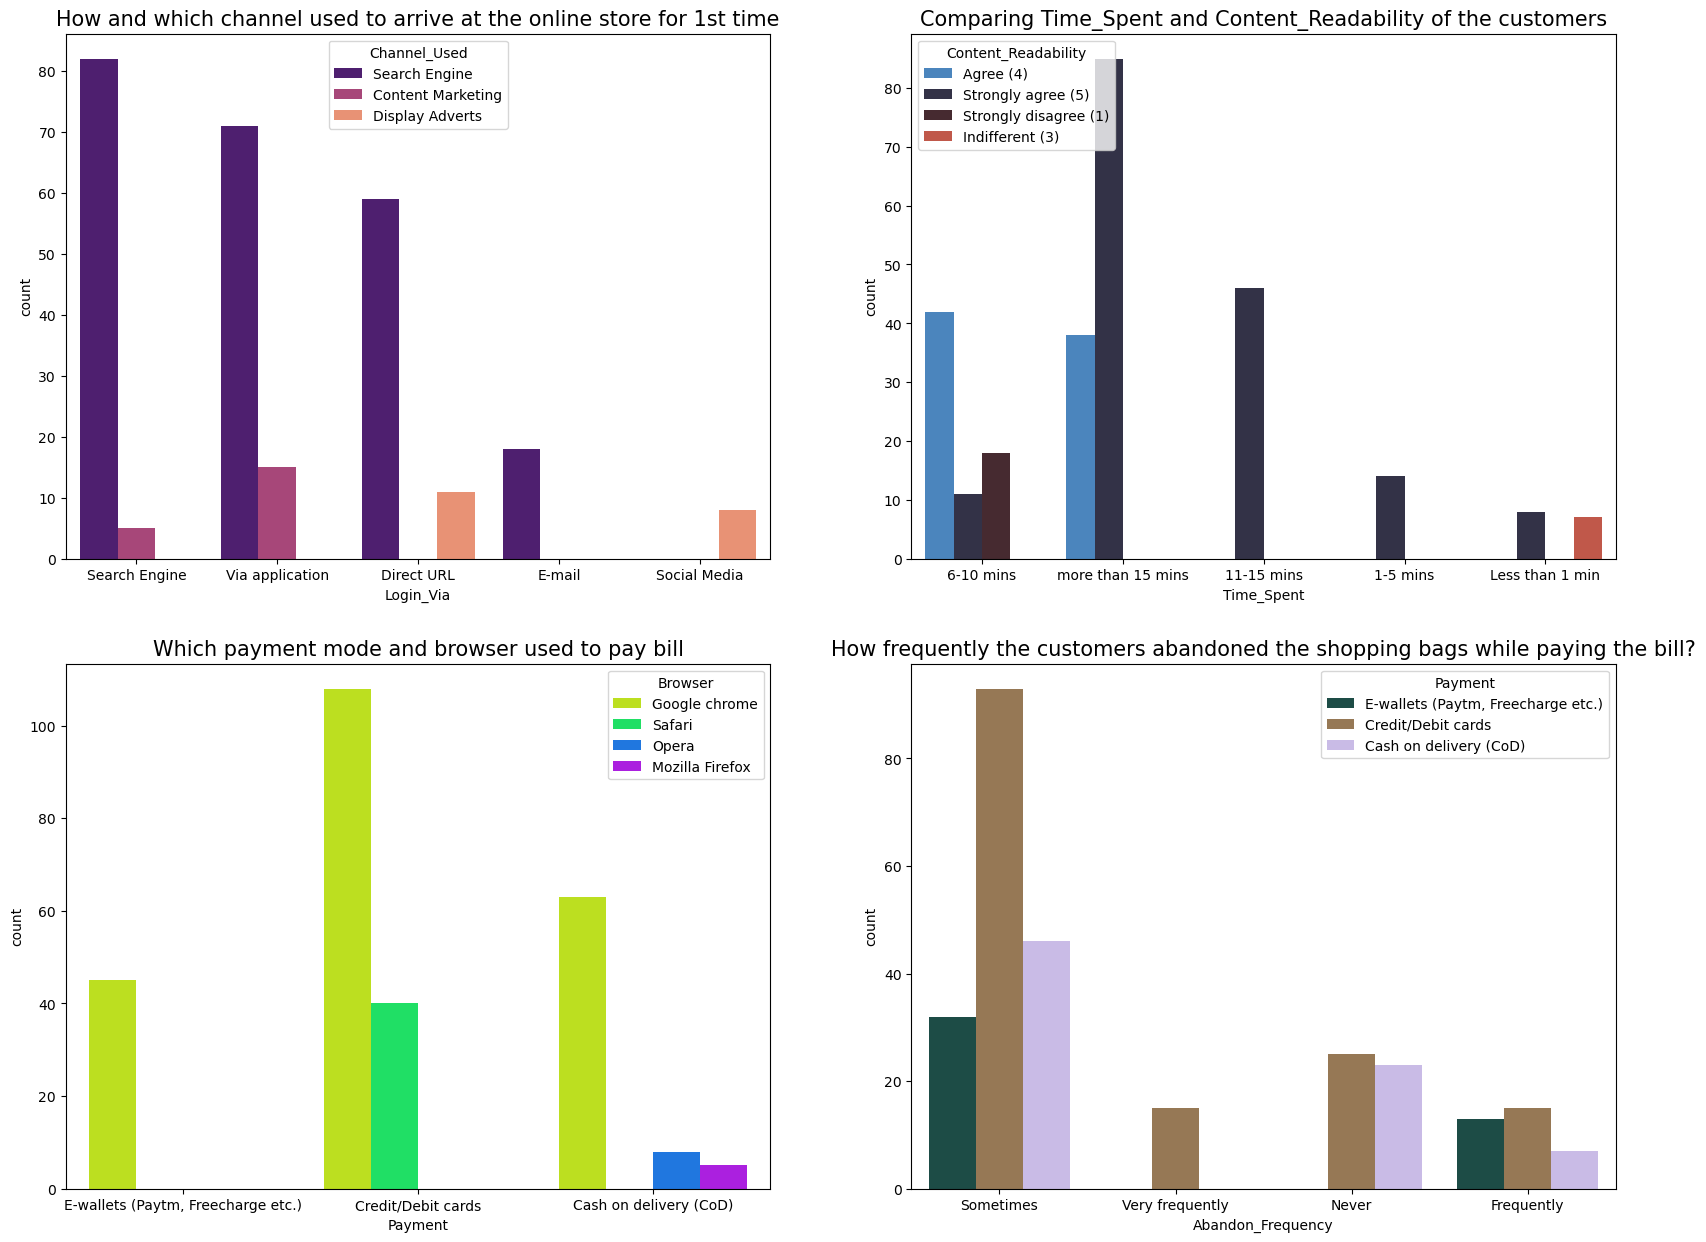

In [40]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,3)
plt.title('Which payment mode and browser used to pay bill',fontsize=15)
sns.countplot(data['Payment'],hue=data['Browser'],palette="hsv");

plt.subplot(2,2,2)
plt.title('Comparing Time_Spent and Content_Readability of the customers',fontsize=15)
sns.countplot(data['Time_Spent'],hue=data['Content_Readability'],palette="icefire");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags while paying the bill?',fontsize=15)
sns.countplot(data['Abandon_Frequency'],hue=data['Payment'],palette="cubehelix");

plt.subplot(2,2,1)
plt.title('How and which channel used to arrive at the online store for 1st time',fontsize=15)
sns.countplot(data['Login_Via'],hue=data['Channel_Used'],palette="magma");

plt.show()


Observation

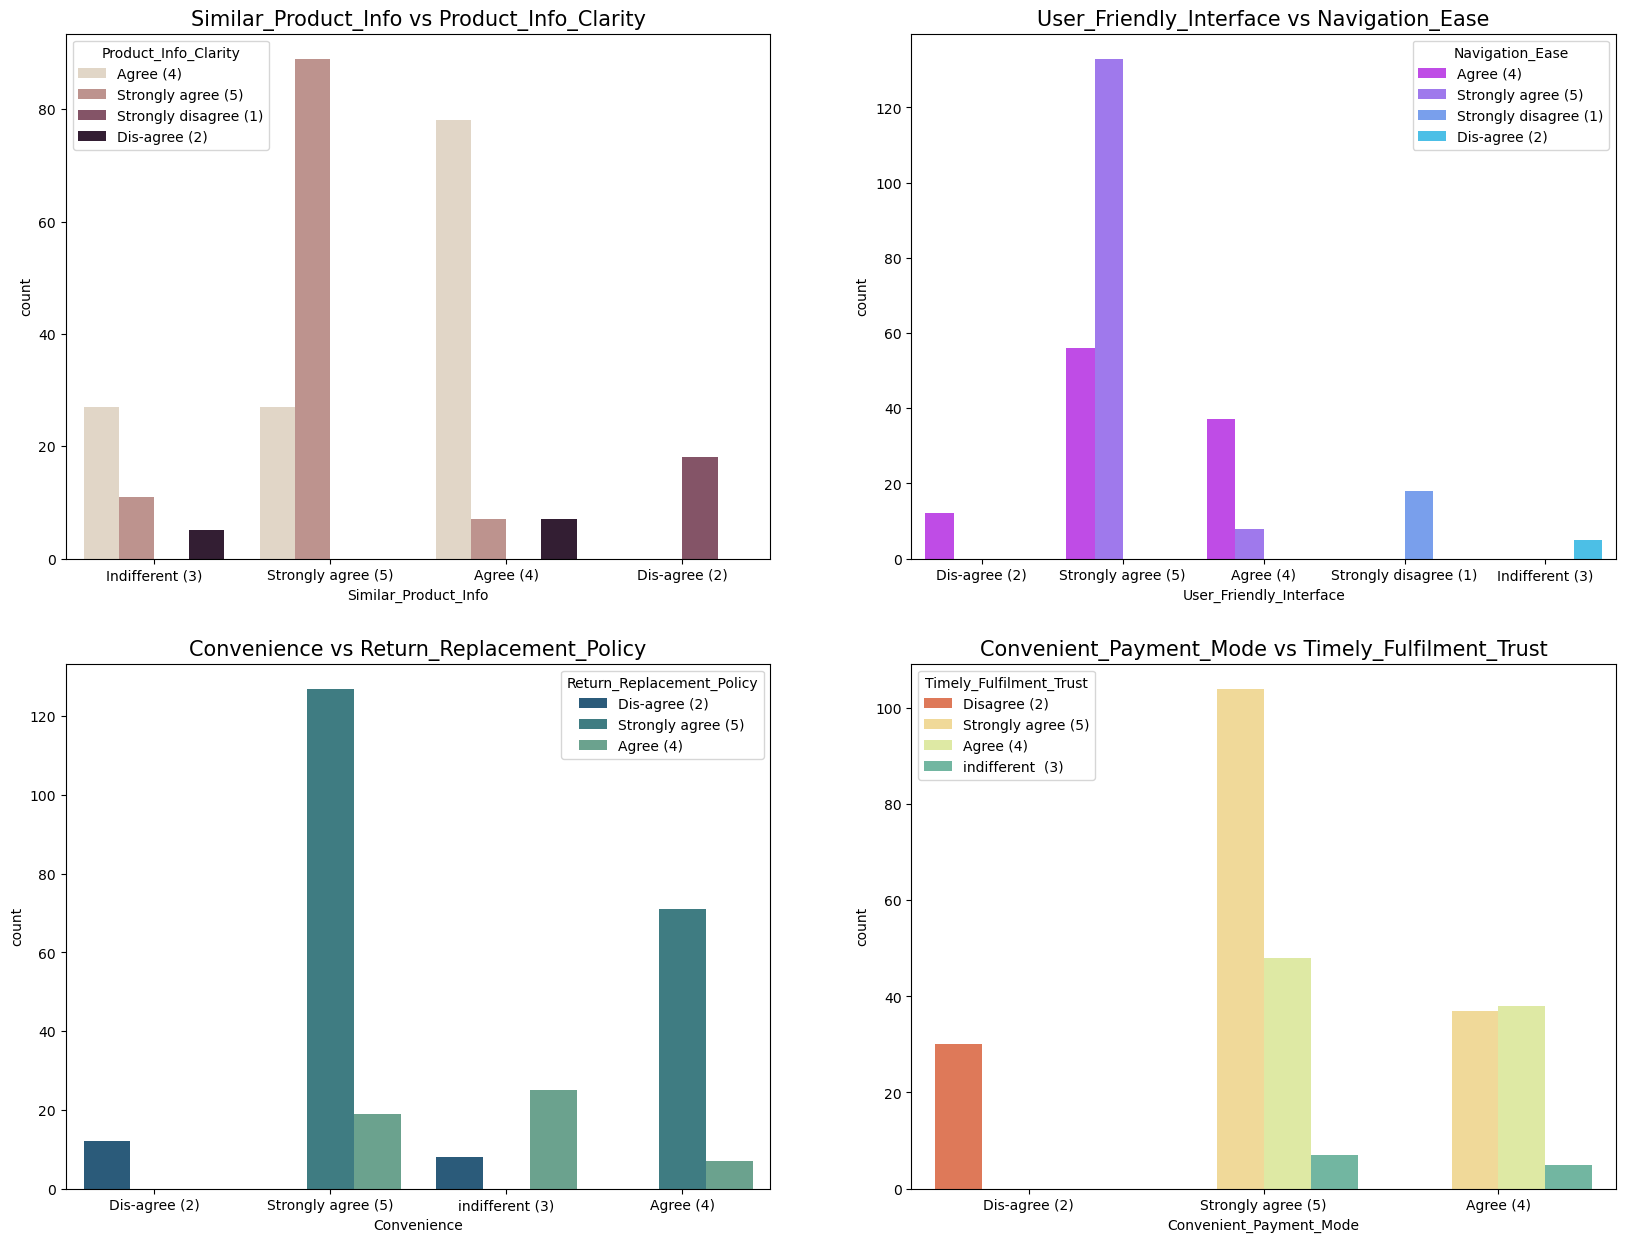

In [43]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Similar_Product_Info vs Product_Info_Clarity',fontsize=15)
sns.countplot(data['Similar_Product_Info'],hue=data['Product_Info_Clarity'],palette="ch:.25");

plt.subplot(2,2,2)
plt.title('User_Friendly_Interface vs Navigation_Ease',fontsize=15)
sns.countplot(data['User_Friendly_Interface'],hue=data['Navigation_Ease'],palette="cool_r");

plt.subplot(2,2,3)
plt.title('Convenience vs Return_Replacement_Policy',fontsize=15)
sns.countplot(data['Convenience'],hue=data['Return_Replacement_Policy'],palette="crest_r");

plt.subplot(2,2,4)
plt.title('Convenient_Payment_Mode vs Timely_Fulfilment_Trust',fontsize=15)
sns.countplot(data['Convenient_Payment_Mode'],hue=data['Timely_Fulfilment_Trust'],palette="Spectral");

plt.subplot(2,2,4).legend(loc ="upper left",title="Timely_Fulfilment_Trust");
plt.show()

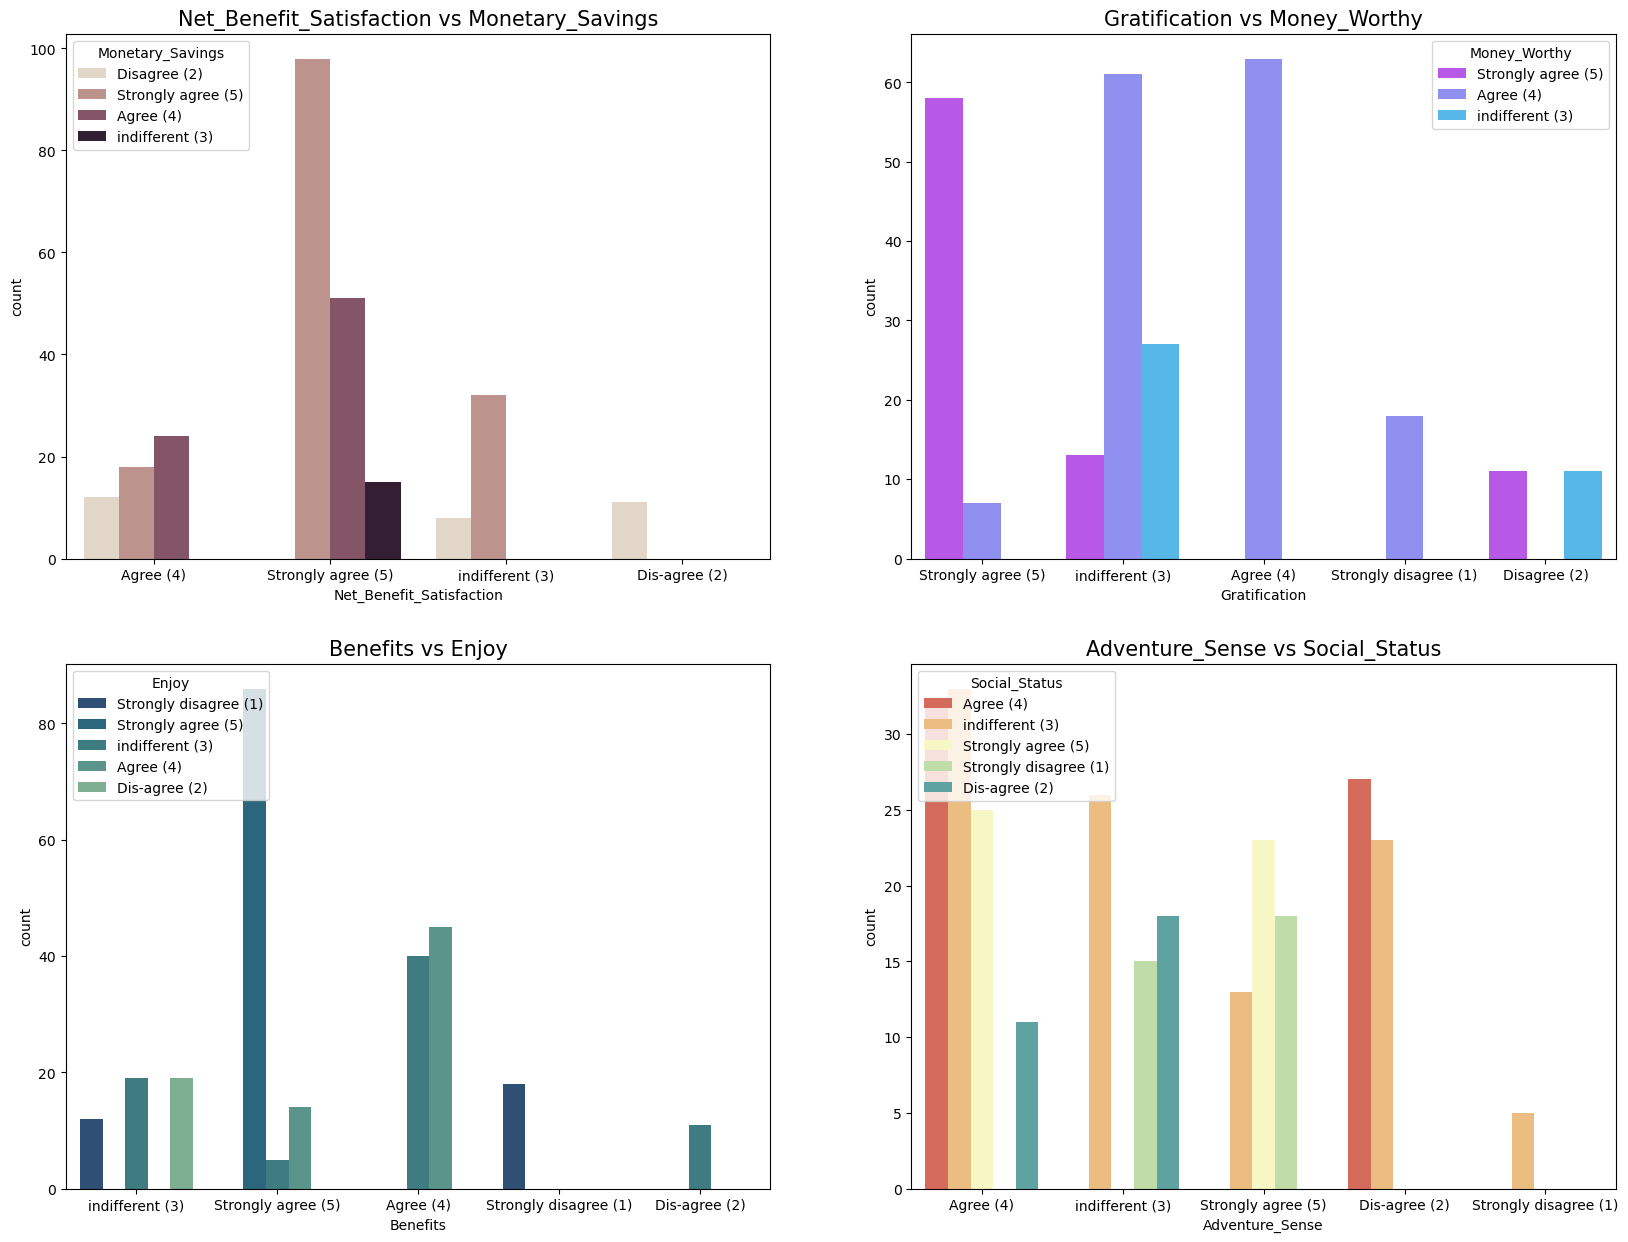

In [44]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Net_Benefit_Satisfaction vs Monetary_Savings',fontsize=15)
sns.countplot(data['Net_Benefit_Satisfaction'],hue=data['Monetary_Savings'],palette="ch:.25");

plt.subplot(2,2,2)
plt.title('Gratification vs Money_Worthy',fontsize=15)
sns.countplot(data['Gratification'],hue=data['Money_Worthy'],palette="cool_r");

plt.subplot(2,2,3)
plt.title('Benefits vs Enjoy',fontsize=15)
sns.countplot(data['Benefits'],hue=data['Enjoy'],palette="crest_r");

plt.subplot(2,2,4)
plt.title('Adventure_Sense vs Social_Status',fontsize=15)
sns.countplot(data['Adventure_Sense'],hue=data['Social_Status'],palette="Spectral");

plt.subplot(2,2,4).legend(loc ="upper left",title="Social_Status");
plt.show()

Observations from Bivariate analysis(Experiences of customers)

1.	Females from every age group tends to shop more than male. Female from the 21-30 yr age group has the highest rate of shopping where as less than 20yr and 51 yr above age group has least no. of customers.

2.	Age group of 31-40yrs,21-30yrs and 41-50 yrs all customers spend more than 15 mins to make a decision to shop products. And the age group less than 20yrs and 51 yrs above spend the least time for shopping.

3.	The customers who are shopping for more than 2,3 and 4 yrs shop atleast 31-40 and 41 times and above a year. There are also customers who shopped for a few months to 1,2 and 3 yrs and shop atleast 10 times a year. There are very less customers who shopped for 42 times and above a yr.

4.	Most of the female customers shopped online for more than 4 year and the count is also high for the females who shopped from 2-3 years. And only few male customers shop online more than 4 years.

5.	Most of the female customers tend to be from Delhi, Greater Noida and Bangalore.

6.	The channel mostly used by the customers is Search engine and tend to use screen size of 5.5 inches. Content marketing and Display Adverts are the least used channels.

7.	Shoppers uses their smartphones the most for the most for online shopping and so it can be related that most of the customers uses mobile internet as their source for browsing.

8.	Windows and Android are used the most to search online products and the most used browser is Google chrome by the customers.

9.	There are sometimes when the customer abandons the shopping bags due to better alternative offers, change in price , lack of trust and Promo code not applicable. Where as there are also some customers who never or frequently abandon the shopping bag due to better alternative offers.

10.	Every first time of the customer, they preferred to use Search Engine and Applications.

11.	As the content readability is good customers spend more than 10 and 15 mins to shop products online.

12.	As most of the customers uses Google Chrome for e-stores it can be observed that more than 50% of the customers make choices to make the payments by Credit/Debit cards followed by Cash on Delivery and the least by E-wallets. There may be a sense of lack of security while doing the transaction by E-wallets that is why most customers avoid doing transactions through it. Customers using Mozilla Firefox and Opera browsers tend to opt for Cash on Deliveries.

13.	There seem to be issues while doing the transaction via Credit /Debit cards to the customers as there is a high rate of abandoning the shopping bag sometimes.

14.	Almost all the customers Strongly Agree that the ecommerce websites should provide a clearer search for the similar product information and there should be a Product information clarity provided.

15.	Most of the customers Strongly agrees that appropriate User-friendly interface can give them a great satisfaction while browsing for products which also can ease navigation on the ecommerce websites. If websites are easy for the navigation customers cannot feel ambiguous while making choices. There are not many customers who disagrees with the easy navigation and User-friendly interfaces of websites.

16.	Most of the customers agreed that return and replacement policy of the e-tailer is important for purchase decision also helping in the convenience and ease for shopping. Return and Replacement policies tend to give a sense of security to the customers about their money and products they are buying. Maximum of customers find it convenient to shop from ecommerce sited that provide return and replacement policies
. 
17.	Almost all the customers strongly agree to have convenient modes of payment which helps the e-retailer to gain trust of the customers.

18.	Most of the customers agreed that the online shopping gives monetary benefits and responsiveness which also gives high amount of net benefit satisfaction. So it is important for the online shopping websites to give monetary benefits if they want to retain their customers.

19.	Most of the customers believed that the more benefits given by the ecommerce websites while online shopping tends to shop more and enjoy the experience of shopping. There are various benefits and campaigns run by the ecommerce sites all over the year which includes heavy discounts on various products. 

20. Customers agrees to the point of social status and adventure sense. It can be observed that maximum of the customers enjoys having a social status and gives them a feeling of Adventure sense

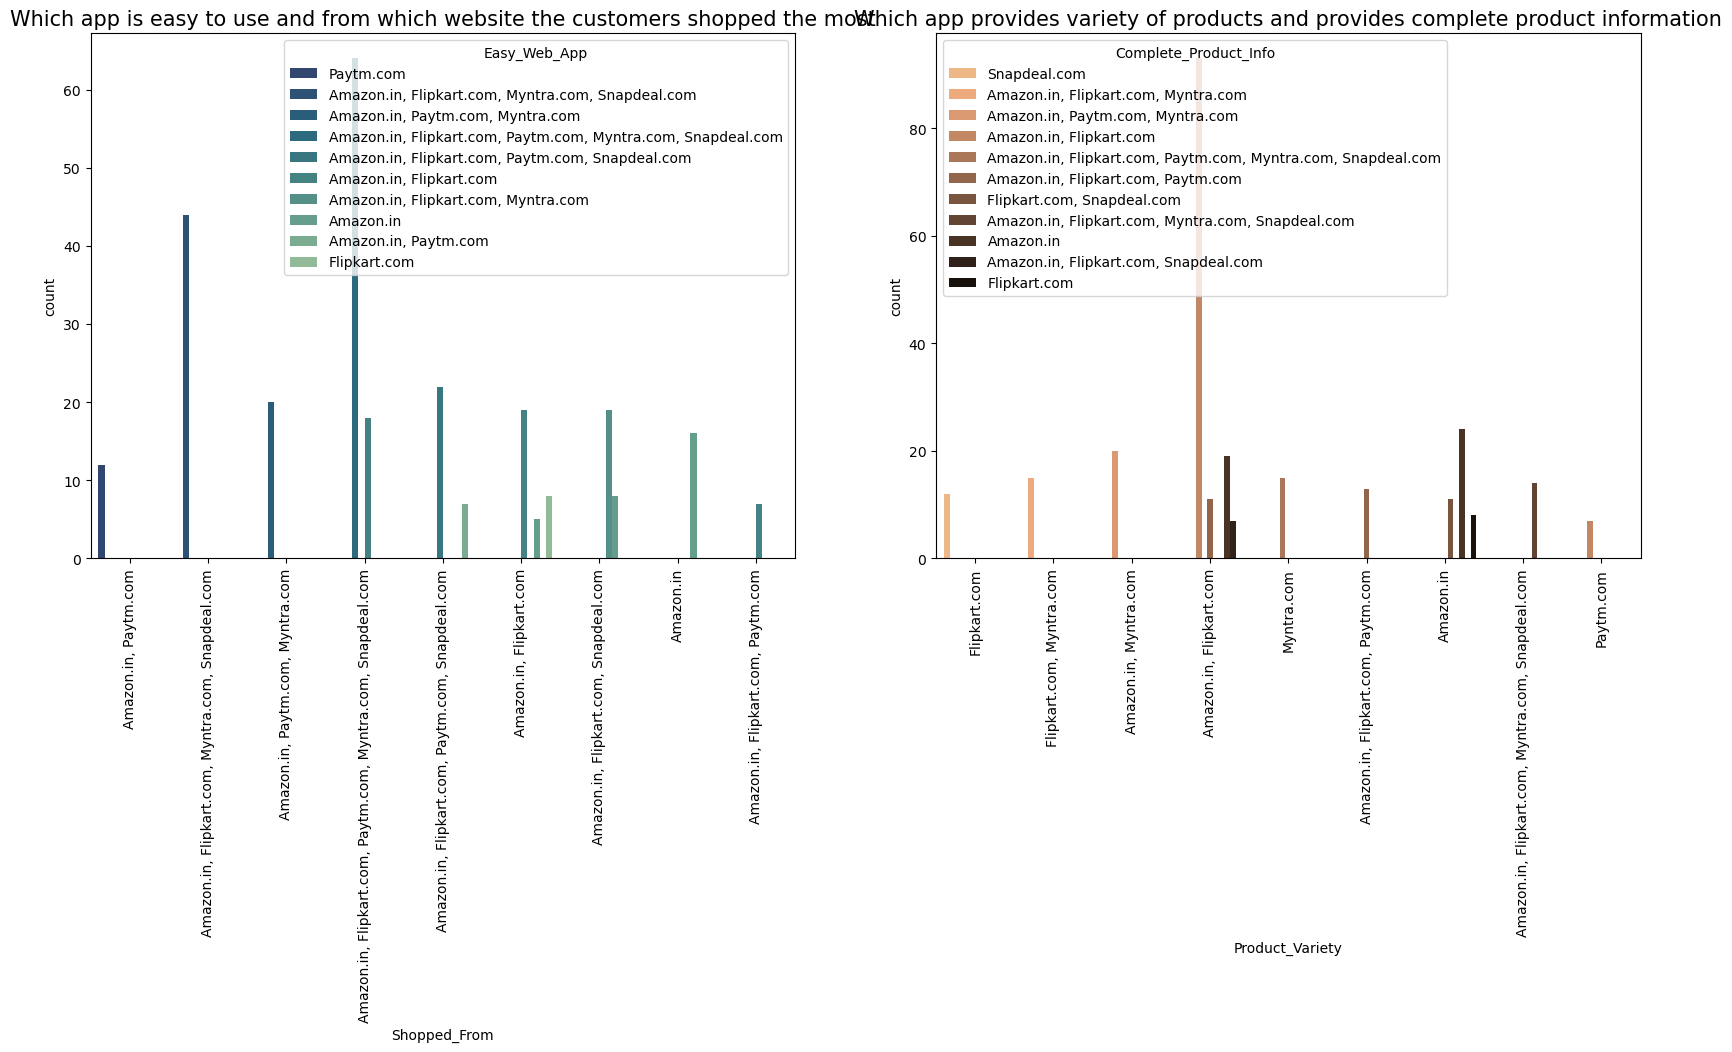

In [46]:
# Comparision between two variables
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Which app is easy to use and from which website the customers shopped the most',fontsize=15)
sns.countplot(x='Shopped_From',hue='Easy_Web_App',palette="crest_r",data=data);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app provides variety of products and provides complete product information',fontsize=15)
sns.countplot(x='Product_Variety',hue='Complete_Product_Info',palette="copper_r",data=data);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Easy_Web_App");
plt.subplot(2,2,2).legend(loc ="upper left",title="Complete_Product_Info");
plt.show()

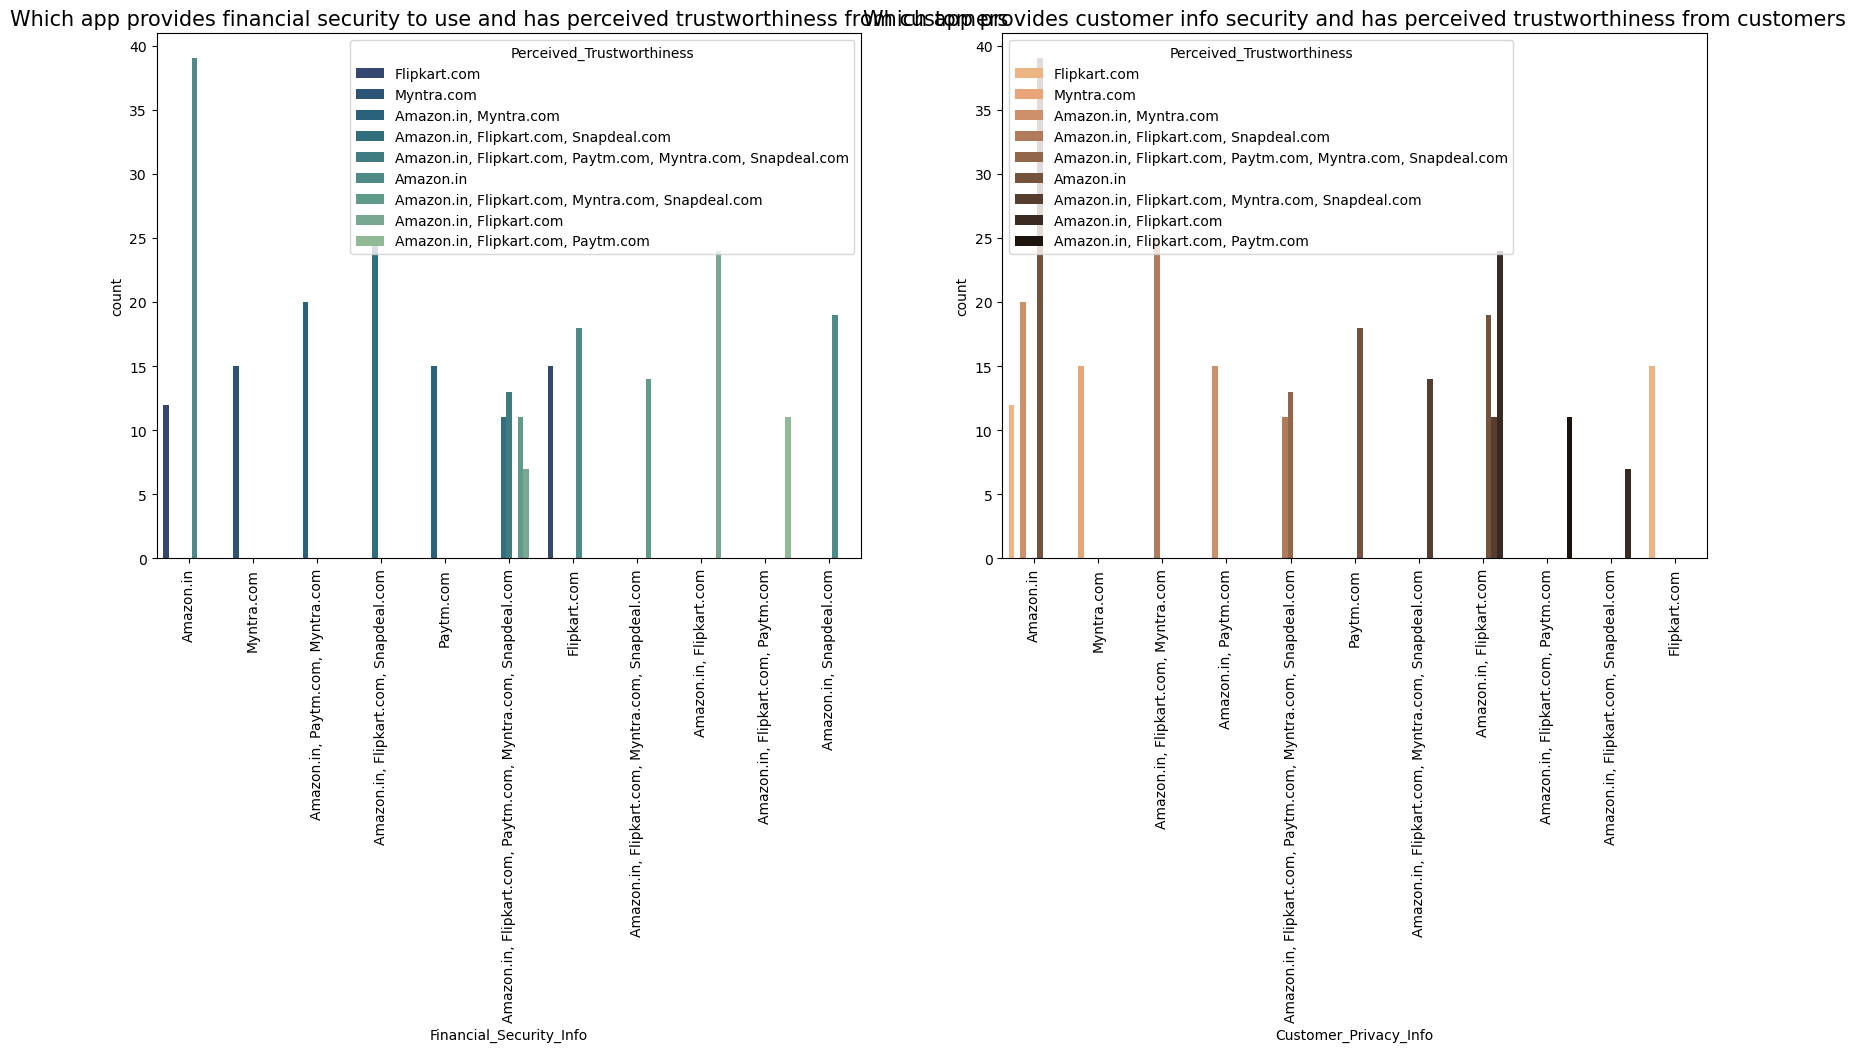

In [48]:
# Comparision between two variables
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Which app provides financial security to use and has perceived trustworthiness from customers',fontsize=15)
sns.countplot(x='Financial_Security_Info',hue='Perceived_Trustworthiness',palette="crest_r",data=data);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app provides customer info security and has perceived trustworthiness from customers',fontsize=15)
sns.countplot(x='Customer_Privacy_Info',hue='Perceived_Trustworthiness',palette="copper_r",data=data);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="Perceived_Trustworthiness");
plt.subplot(2,2,2).legend(loc ="upper left",title="Perceived_Trustworthiness");
plt.show()

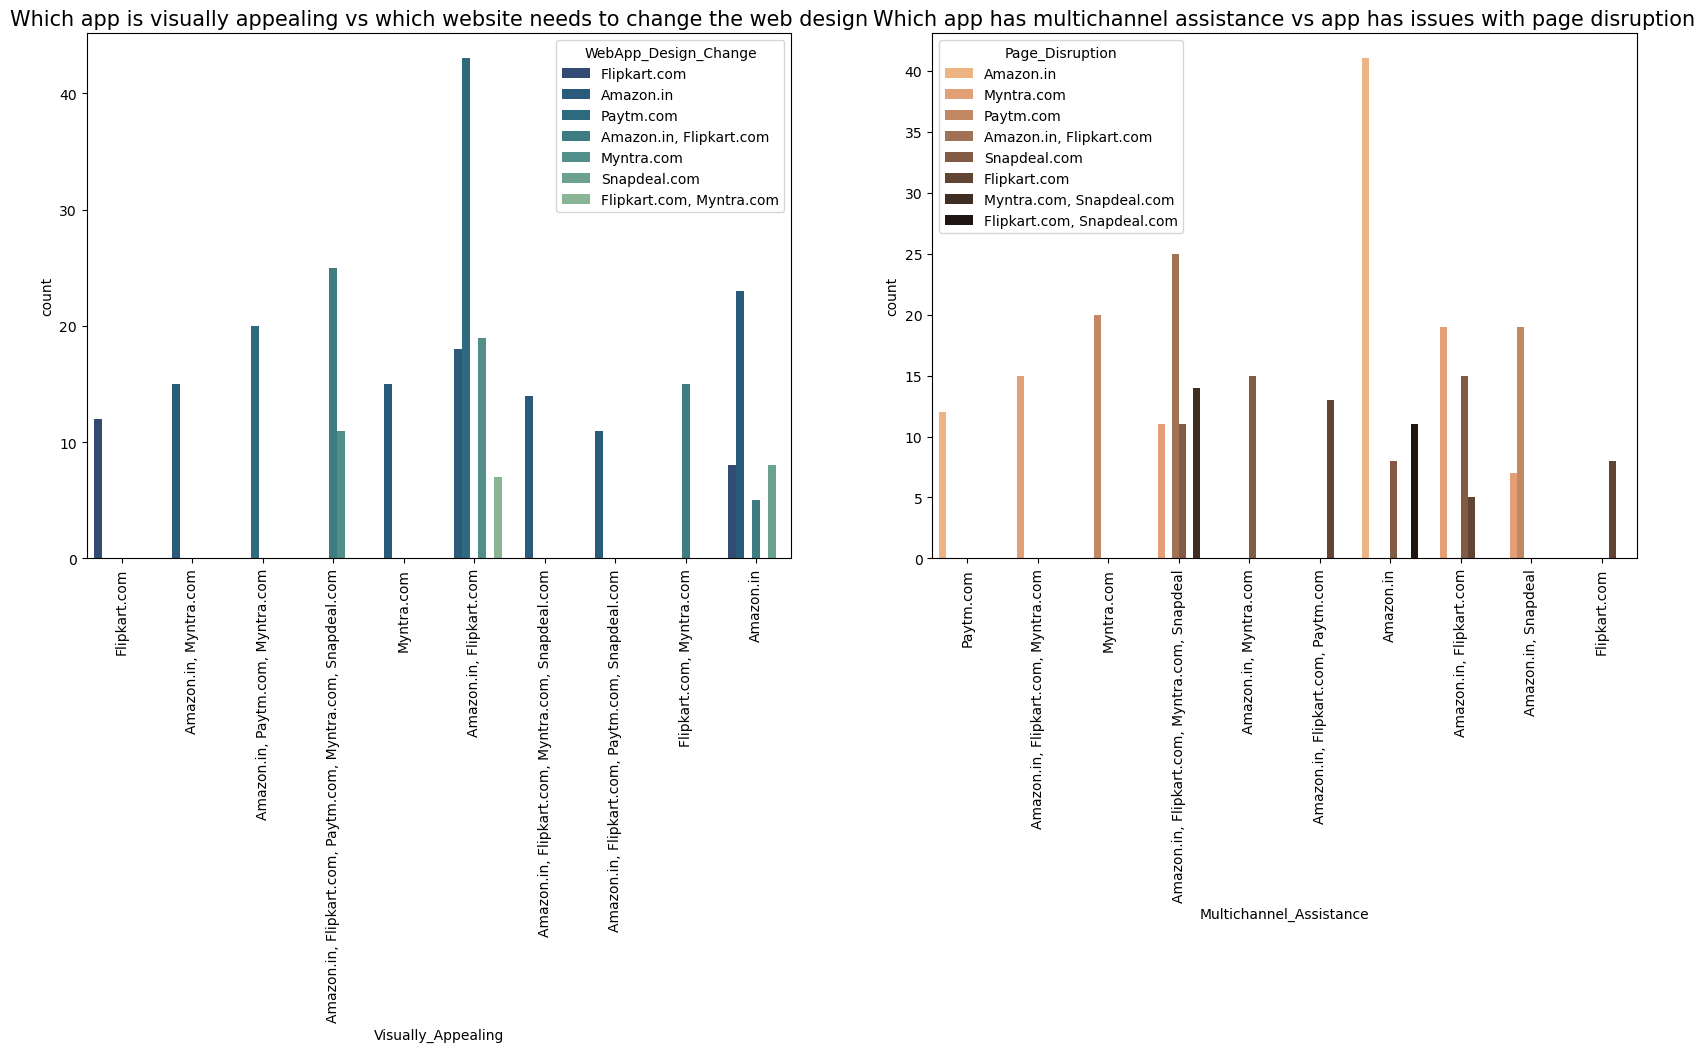

In [52]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Which app is visually appealing vs which website needs to change the web design',fontsize=15)
sns.countplot(x='Visually_Appealing',hue='WebApp_Design_Change',palette="crest_r",data=data);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Which app has multichannel assistance vs app has issues with page disruption',fontsize=15)
sns.countplot(x='Multichannel_Assistance',hue='Page_Disruption',palette="copper_r",data=data);
plt.xticks(rotation=90)

plt.subplot(2,2,1).legend(loc='upper right',title="WebApp_Design_Change");
plt.subplot(2,2,2).legend(loc ="upper left",title="Page_Disruption");
plt.show()

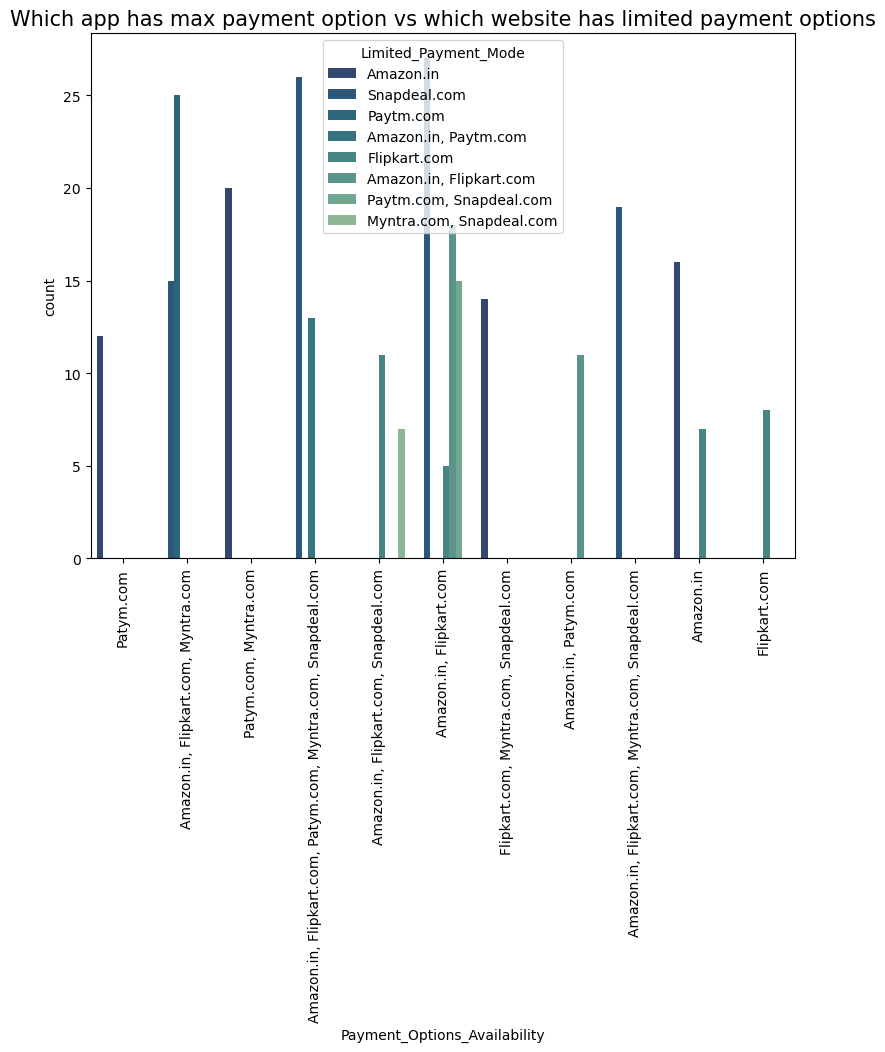

In [53]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Which app has max payment option vs which website has limited payment options',fontsize=15)
sns.countplot(x='Payment_Options_Availability',hue='Limited_Payment_Mode',palette="crest_r",data=data);
plt.xticks(rotation=90)

plt.show()

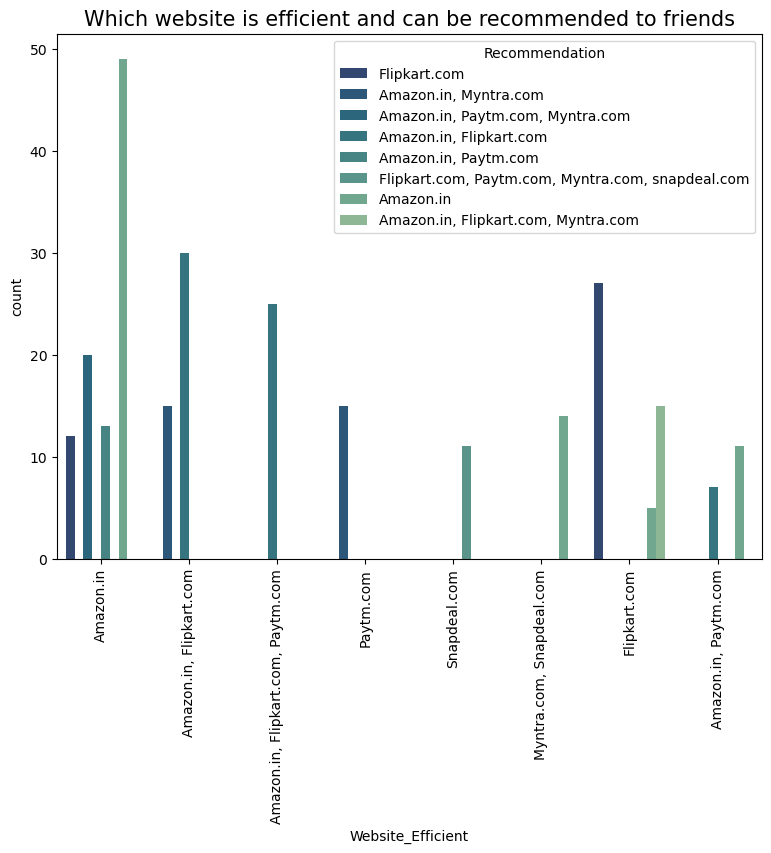

In [56]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
plt.title('Which website is efficient and can be recommended to friends',fontsize=15)
sns.countplot(x='Website_Efficient',hue='Recommendation',palette="crest_r",data=data);
plt.xticks(rotation=90)

plt.show()

Bivariate Analysis for different platforms
1.	Above 50% of the customers uses Amazon.in Flipkart.com Paytm.com, Myntra.com and Snapdeal.com as the shopping platforms which are also easy to use. The reason of using these websites for shopping must be a good user interface.

2.	Amazon.in Flipkart.com provides the highest rate of product variety which can also be a reason to gain popularity among the customers. These websites provide a complete product information which helps customers to make purchase decision easier and wiser.

3.	The customers financial information security and the privacy of the customers personal information is the highest priority of the websites to keep it safely and not leak the information. Amazon. In tends to be the most trustworthy sites in the sense of Financial Information security of a customer followed by  Flipkart.com Paytm.com, Myntra.com and Snapdeal.com. These sites gain the highest rates for perceived trustworthiness.

4.	There are a lot no. of customers who purchase products from amazon.in and it can be observed that all of them agrees that the website is visually appealing but still thinks that there should be a web design change in it which is same in the case of Flipcart.com. Users have a opinion of changing the web designs of almost all the sites though they use the same for shopping.

5.	Amazon.in gives a higher rate of multichannel assistance and at the same time has issues with the page disruption followed by the sites Flipcart.com and Myntra.com. Snapdeal has limited mode of payment on most of the products followed by Amazon. Having different types of payment methods will helps the customers to pay the invoice easily using their choice of payment and if the websites have speedy delivery methods without delivery charge, then the customers like to buy the products in those websites.

6.	Amazon is the website which is more efficient as Amazon.com. Also Amazon.in, Flipkart and Myntra are the highly recommended online retailer sites for purchasing all types of products, as they provide enormous amounts of benefits. 


# Encoding Categorical data

In [57]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i]=LE.fit_transform(data[i])

In [58]:
# Checking the dataframe after encoding
data.head()

Gender  Age  City  Pincode  Yrs_of_Shopping  Shopping_Frequency  Internet  \
0       1    1     2   110009                3                   2         0   
1       0    0     2   110030                3                   3         3   
2       0    0     4   201308                2                   3         1   
3       1    0     6   132001                2                   5         1   
4       0    0     0   530068                1                   0         3   

   Device  Screen_Size  OS  Browser  Channel_Used  Login_Via  Time_Spent  \
0       0            3   2        0             2          2           2   
1       2            0   1        0             2          4           4   
2       2            2   0        0             2          4           1   
3       2            2   1        3             2          2           2   
4       2            0   1        3             0          4           4   

   Payment  Abandon_Frequency  Abandon_Reason  Content_Readability  \
0        2                  2               2                    0   
1        1                  3               4                    2   
2        2                  2               4                    2   
3        1                  1               0                    0   
4        1                  0               0                    2   

   Similar_Product_Info  Seller_Product_Info  Product_Info_Clarity  \
0                     2                    2                     0   
1                     3                    3                     2   
2                     0                    0                     0   
3                     0                    2                     0   
4                     2                    2                     0   

   Navigation_Ease  Loading_Processing_Speed  User_Friendly_Interface  \
0                0                         4                        1   
1                2                         3                        3   
2                0                         0                        3   
3                2                         0                        3   
4                0                         3                        3   

   Convenient_Payment_Mode  Timely_Fulfilment_Trust  \
0                        1                        1   
1                        2                        2   
2                        2                        2   
3                        2                        0   
4                        2                        0   

   Customer_Support_Response  Customer_Privacy_Guarantee  \
0                          1                           0   
1                          1                           1   
2                          1                           1   
3                          1                           1   
4                          1                           0   

   Various_Channel_Responses  Benefits  Enjoy  Convenience  \
0                          0         4      3            1   
1                          1         2      2            2   
2                          1         2      2            2   
3                          0         0      4            3   
4                          1         2      2            2   

   Return_Replacement_Policy  Loyalty_Programs_Access  Info_Satisfaction  \
0                          1                        0                  2   
1                          2                        2                  1   
2                          2                        2                  1   
3                          0                        4                  2   
4                          2                        1                  0   

   Site_Quality_Satisfaction  Net_Benefit_Satisfaction  Trust  \
0                          2                         0      2   
1                          2                         2      2   
2                          2                         2      0   
3 

In [59]:
# Checking the statistical summary of the data
data.describe()

Gender         Age        City        Pincode  Yrs_of_Shopping  \
count  269.000000  269.000000  269.000000     269.000000       269.000000   
mean     0.327138    1.330855    4.494424  220465.747212         2.323420   
std      0.470042    1.183774    3.187687  140524.341051         1.176357   
min      0.000000    0.000000    0.000000  110008.000000         0.000000   
25%      0.000000    0.000000    2.000000  122018.000000         1.000000   
50%      0.000000    1.000000    4.000000  201303.000000         3.000000   
75%      1.000000    2.000000    7.000000  201310.000000         3.000000   
max      1.000000    4.000000   10.000000  560037.000000         4.000000   

       Shopping_Frequency    Internet      Device  Screen_Size          OS  \
count          269.000000  269.000000  269.000000   269.000000  269.000000   
mean             3.237918    2.078067    1.501859     2.256506    1.137546   
std              1.739331    0.715919    0.751240     0.944942    0.867985   
min              0.000000    0.000000    0.000000     0.000000    0.000000   
25%              2.000000    2.000000    1.000000     2.000000    0.000000   
50%              3.000000    2.000000    2.000000     2.000000    1.000000   
75%              5.000000    3.000000    2.000000     3.000000    2.000000   
max              5.000000    3.000000    3.000000     3.000000    2.000000   

          Browser  Channel_Used   Login_Via  Time_Spent     Payment  \
count  269.000000    269.000000  269.000000  269.000000  269.000000   
mean     0.524164      1.780669    2.081784    2.695167    0.884758   
std      1.097985      0.566672    1.555204    1.336910    0.661938   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      0.000000      2.000000    0.000000    2.000000    0.000000   
50%      0.000000      2.000000    2.000000    3.000000    1.000000   
75%      0.000000      2.000000    4.000000    4.000000    1.000000   
max      3.000000      2.000000    4.000000    4.000000    2.000000   

       Abandon_Frequency  Abandon_Reason  Content_Readability  \
count         269.000000      269.000000           269.000000   
mean            1.617100        1.327138             1.446097   
std             0.781219        1.589626             0.989626   
min             0.000000        0.000000             0.000000   
25%             1.000000        0.000000             0.000000   
50%             2.000000        1.000000             2.000000   
75%             2.000000        3.000000             2.000000   
max             3.000000        4.000000             3.000000   

       Similar_Product_Info  Seller_Product_Info  Product_Info_Clarity  \
count            269.000000           269.000000            269.000000   
mean               1.680297             1.587361              1.040892   
std                1.330618             1.375691              1.076461   
min                0.000000             0.000000              0.000000   
25%                0.000000             0.000000              0.000000   
50%                2.000000             2.000000              1.000000   
75%                3.000000             3.000000              2.000000   
max                3.000000             4.000000              3.000000   

       Navigation_Ease  Loading_Processing_Speed  User_Friendly_Interface  \
count       269.000000                269.000000               269.000000   
mean          1.267658                  1.617100                 2.457249   
std           1.055774                  1.483191                 1.216734   
min           0.000000                  0.000000                 0.000000   
25%           0.000000                  0.000000                 3.000000   
50%           2.000000                  2.000000                 3.000000   
75%           2.000000                  3.000000                 3.000000   
max           3.000000                  4.000000                 4.000000   

       Convenient_Payment_M

# Identifying Outliers

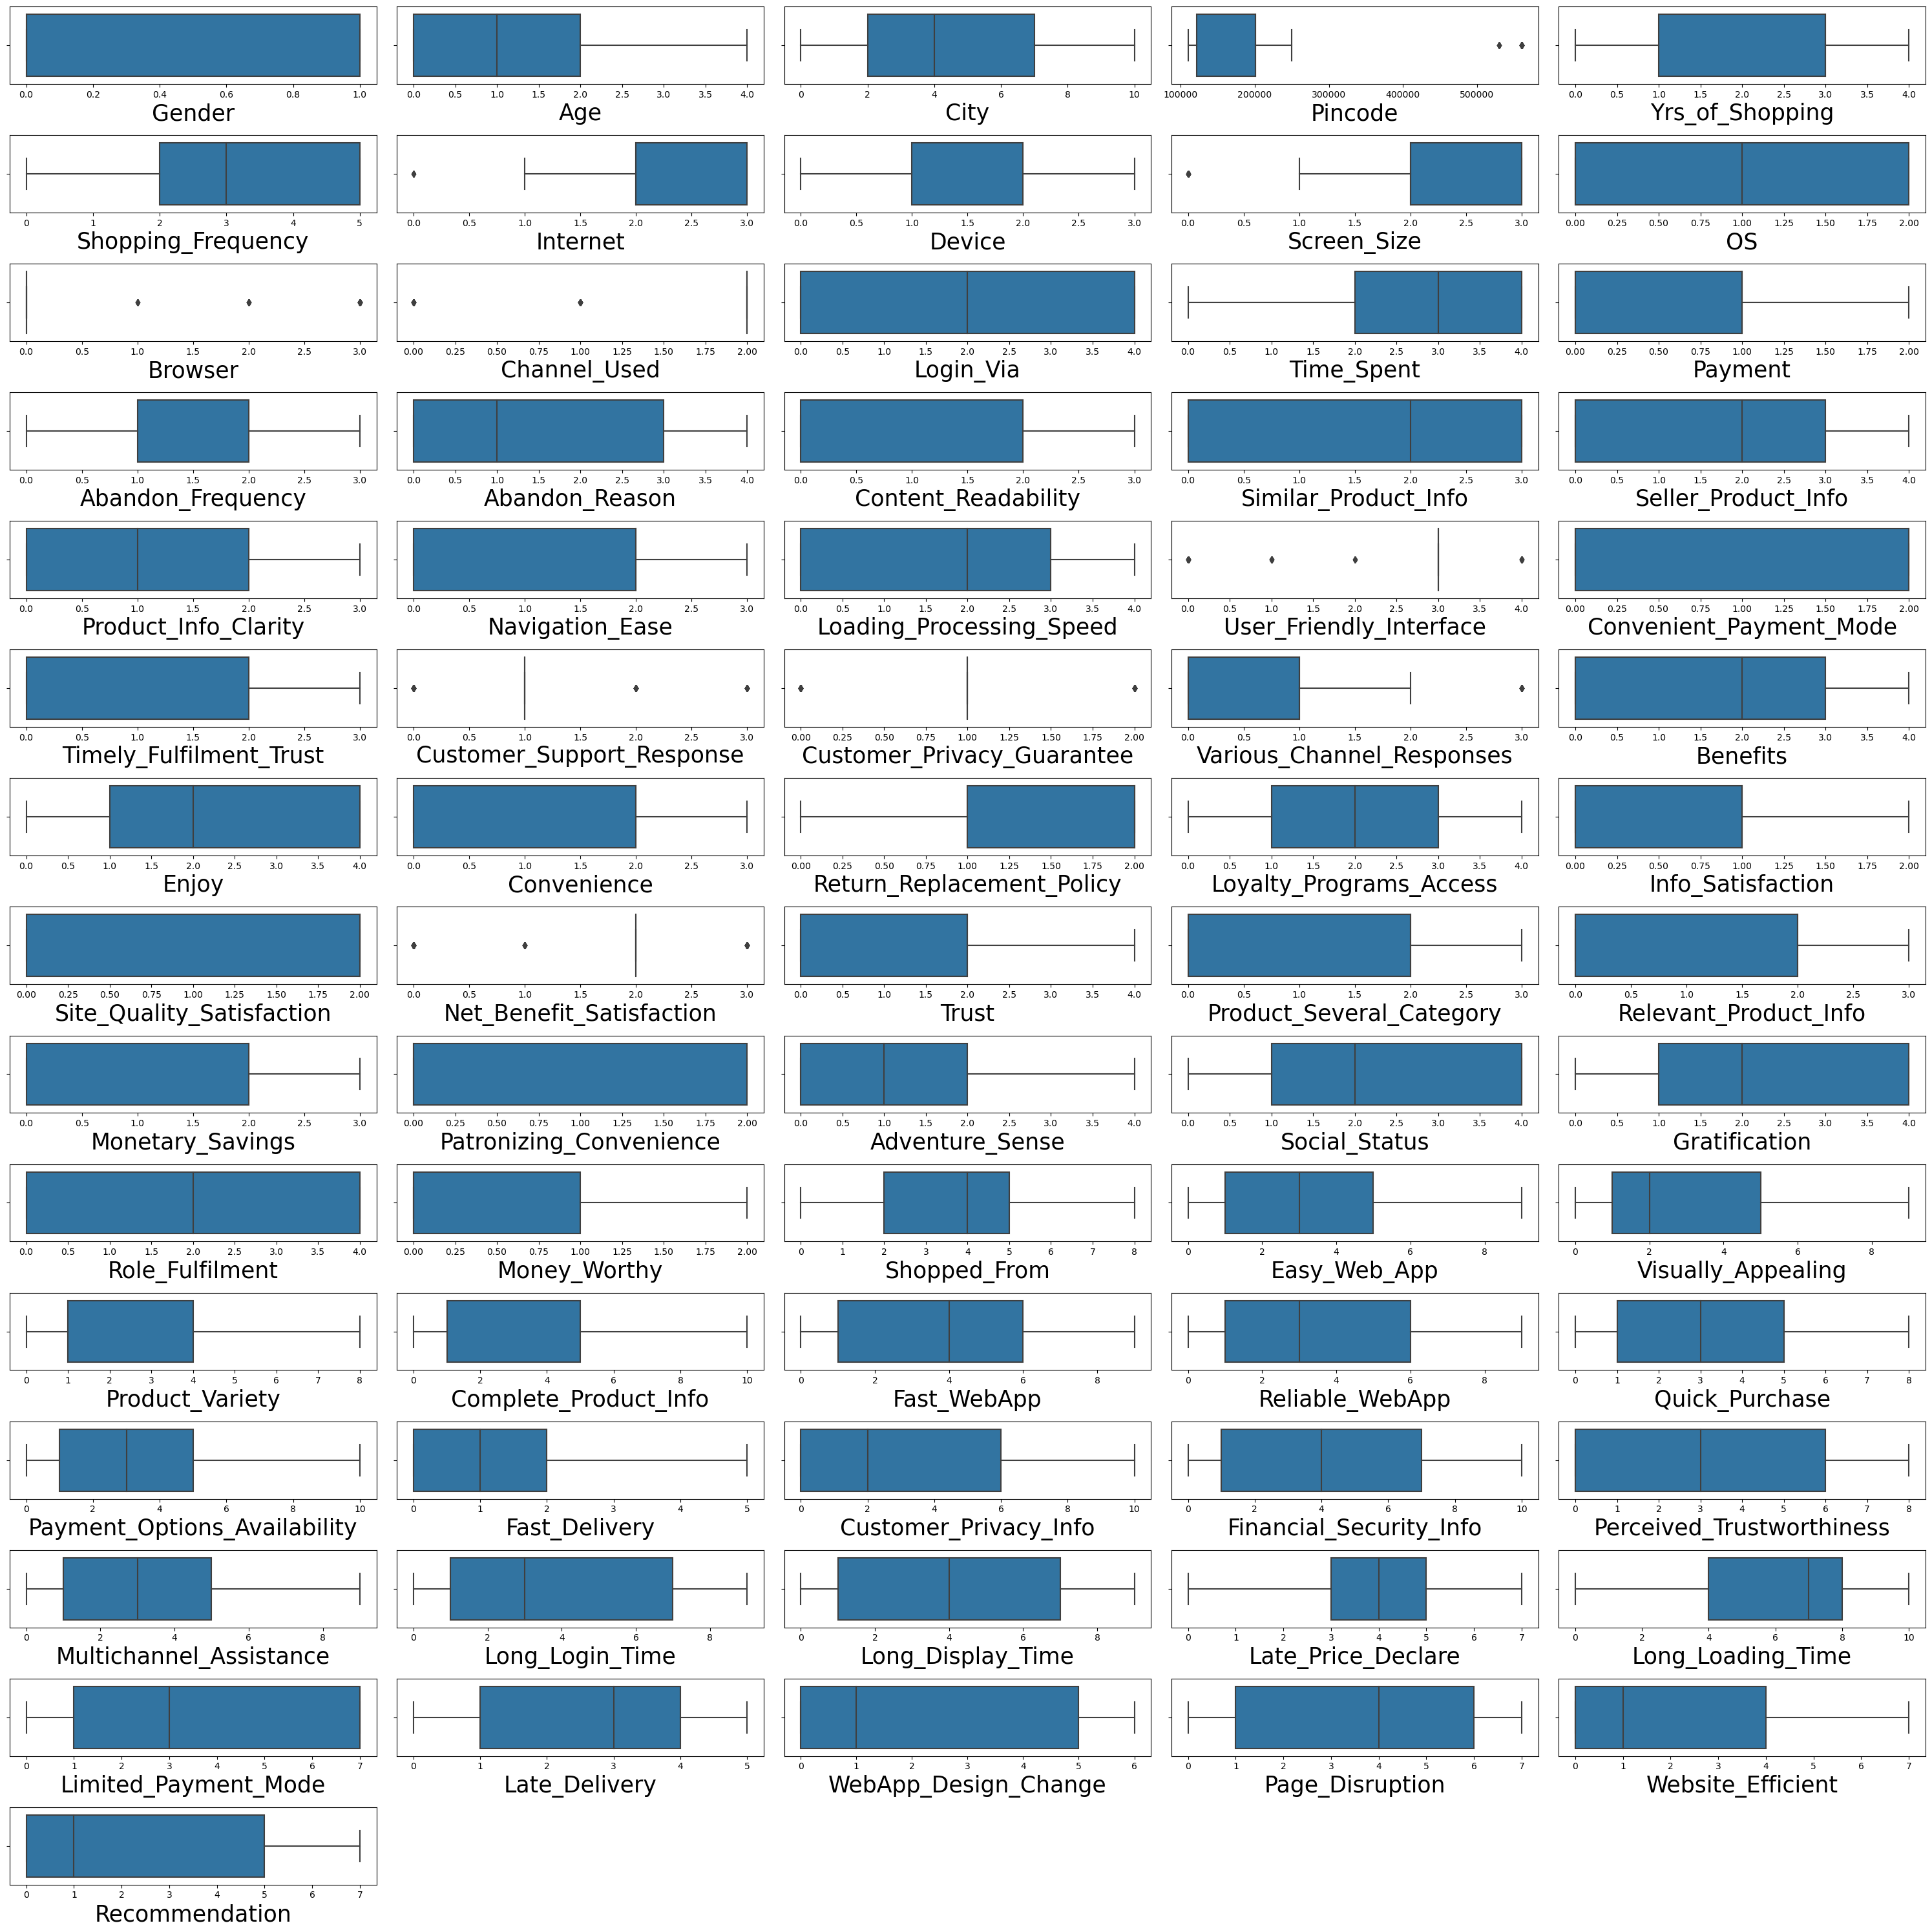

In [67]:
#checking the outliers by plotting boxplots
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=71:
        ax = plt.subplot(15,5,plotnumber)
        sns.boxplot(data[column],palette='tab20')
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

# Checking Skewness in the data

In [66]:
data.skew()

Gender                  0.741028
Age                     0.680987
City                    0.313729
Pincode                 1.748322
Yrs_of_Shopping        -0.276968
                          ...   
Late_Delivery          -0.147702
WebApp_Design_Change    0.354163
Page_Disruption        -0.100608
Website_Efficient       0.662084
Recommendation          0.583614
Length: 71, dtype: float64

# Checking Correlation

In [68]:
# Checking the correlation between the independent variables
corr = data.corr()
corr

Gender       Age      City   Pincode  Yrs_of_Shopping  \
Gender                1.000000  0.046169  0.080912 -0.260365        -0.057096   
Age                   0.046169  1.000000  0.113712 -0.120704        -0.087847   
City                  0.080912  0.113712  1.000000 -0.416597        -0.138329   
Pincode              -0.260365 -0.120704 -0.416597  1.000000        -0.090049   
Yrs_of_Shopping      -0.057096 -0.087847 -0.138329 -0.090049         1.000000   
...                        ...       ...       ...       ...              ...   
Late_Delivery         0.060838 -0.156173 -0.123369 -0.078660         0.218641   
WebApp_Design_Change -0.164818 -0.134558  0.000427 -0.058715         0.220347   
Page_Disruption      -0.256638 -0.018825  0.019167  0.039936         0.025919   
Website_Efficient     0.055663 -0.008582  0.007117  0.037662        -0.024316   
Recommendation       -0.003372 -0.135263 -0.142123 -0.045388         0.136106   

                      Shopping_Frequency  Internet    Device  Screen_Size  \
Gender                          0.077876 -0.309029  0.061673     0.028794   
Age                             0.309575  0.255594  0.022383    -0.006101   
City                            0.173871 -0.010436  0.020650     0.199296   
Pincode                        -0.263685  0.005511 -0.004980    -0.211198   
Yrs_of_Shopping                 0.013315  0.226883 -0.125240     0.139924   
...                                  ...       ...       ...          ...   
Late_Delivery                  -0.130651  0.101297 -0.104665     0.048533   
WebApp_Design_Change            0.007841  0.147770 -0.052146     0.418180   
Page_Disruption                -0.127148  0.349813  0.084876    -0.065658   
Website_Efficient              -0.124076  0.266932  0.333868    -0.100462   
Recommendation                 -0.152028  0.041129  0.099425     0.074453   

                            OS   Browser  Channel_Used  Login_Via  Time_Spent  \
Gender               -0.019243  0.071385     -0.079834  -0.189867   -0.042602   
Age                  -0.048087 -0.231530      0.186455  -0.091771   -0.218962   
City                 -0.051642 -0.051933      0.147015  -0.238503   -0.232425   
Pincode              -0.053901  0.089281     -0.264197   0.195495    0.117338   
Yrs_of_Shopping       0.274201 -0.192406      0.168383  -0.075699    0.029706   
...                        ...       ...           ...        ...         ...   
Late_Delivery         0.397953 -0.040926      0.024523  -0.097582    0.338568   
WebApp_Design_Change  0.059894 -0.361177      0.230035   0.006498    0.151142   
Page_Disruption       0.111380 -0.140598     -0.160506  -0.147202    0.166045   
Website_Efficient    -0.128611  0.217783     -0.518953  -0.321530    0.173519   
Recommendation       -0.159579 -0.184207     -0.071146   0.279474    0.290108   

                       Payment  Abandon_Frequency  Abandon_Reason  \
Gender                0.073649           0.149324        0.090947   
Age                  -0.079731           0.068907        0.172284   
City                 -0.006495          -0.027082        0.018034   
Pincode               0.031185          -0.132583       -0.139742   
Yrs_of_Shopping       0.076795          -0.014973       -0.052800   
...                        ...                ...             ...   
Late_Delivery         0.234571           0.381400        0.156718   
WebApp_Design_Change  0.363750           0.063312        0.011251   
Page_Disruption       0.126083           0.161529        0.024148   
Website_Efficient    -0.396873          -0.081875        0.035921   
Recommendation        0.308523           0.119196        0.448997   

                      Content_Readability  Similar_Product_Info  \
Gender                          -0.266768             -0.213973   
Age                              0.182499             -0.202649   
City                            -0.053618             -0.224746   
Pincode                          0.211828              0

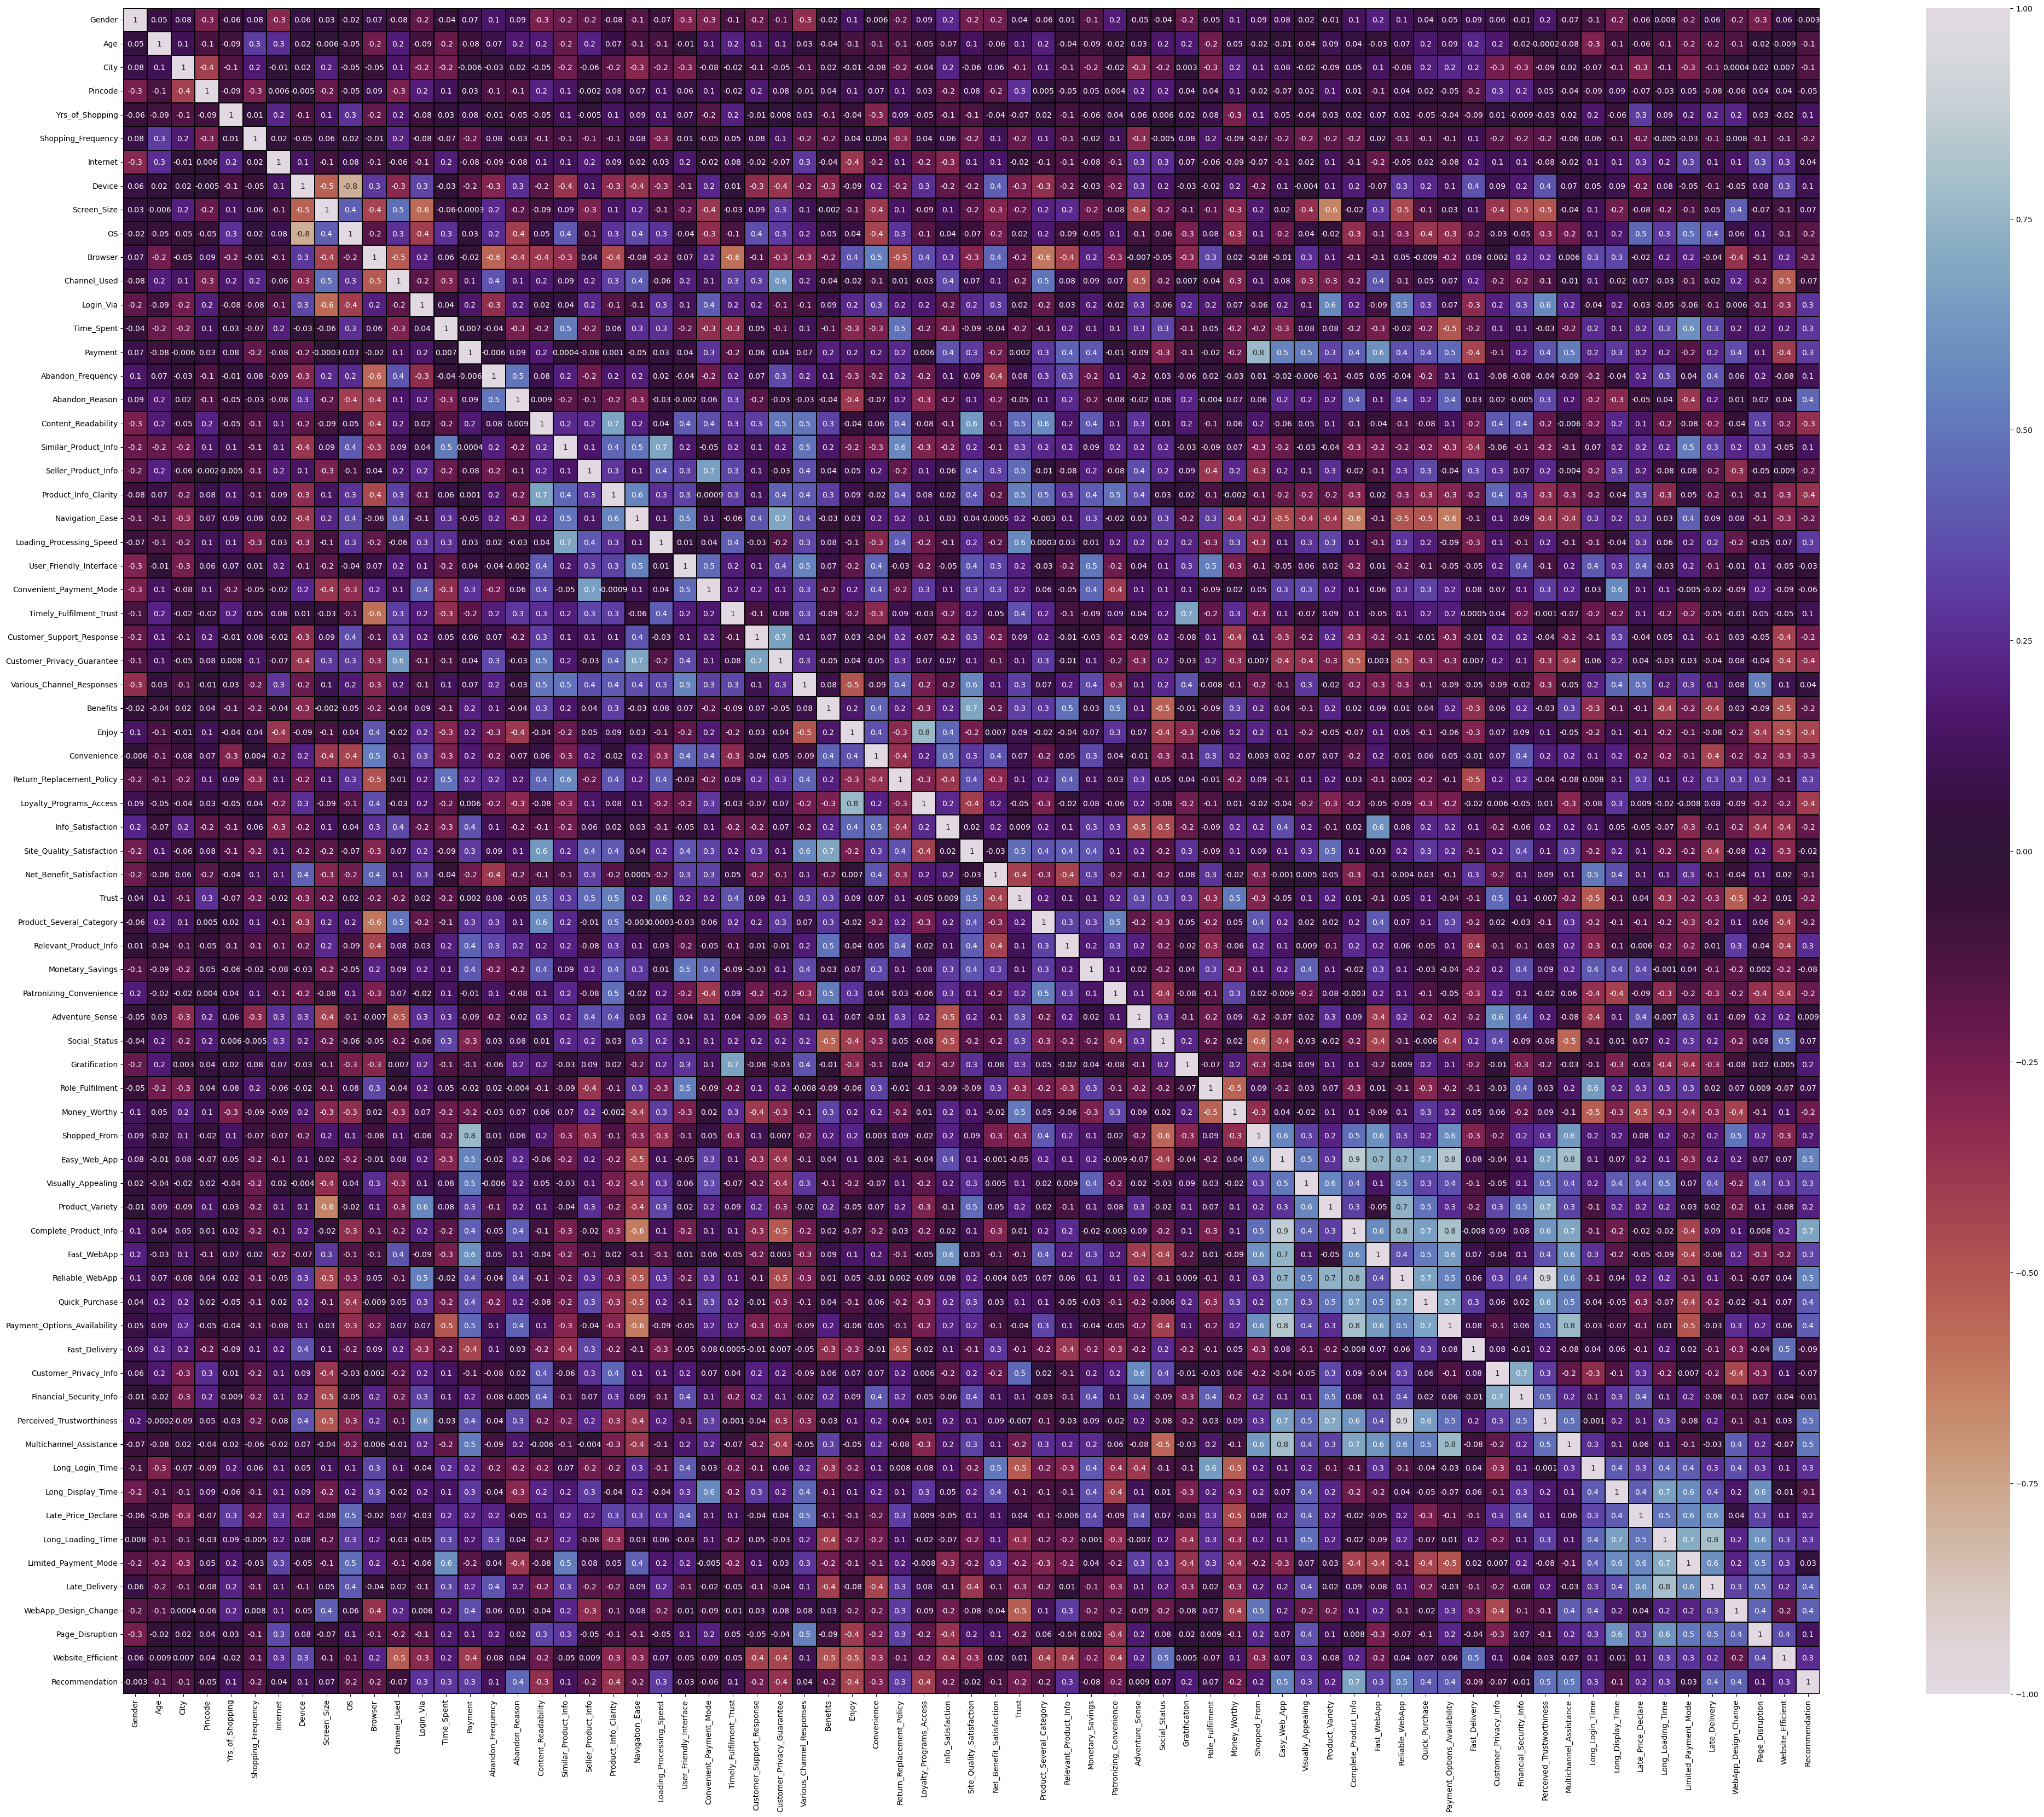

In [71]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(50,40))
sns.heatmap(data.corr(),linewidths=.1,vmin=-1,vmax=1,fmt='.1g',linecolor='black',annot = True,annot_kws={'size':10},cmap='twilight_r')
plt.show()

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat mapcontains both positive and negative correlation.

1.Dark shades are highly correlated.

2.Light shades are less correlated.

3.By looking at the heat map it can be observed that most of the columns have strong correlation with each other, which leads to multicollinearity issue and it will impact on the model accuracy.